### **Lista delle funzioni**


In [141]:
from larlib import *

In [142]:
def larCircle(radius=1.,angle=2*PI,dim=1):
   def larCircle0(shape=36):
      domain = larIntervals([shape])([angle])
      V,CV = domain
      x = lambda p : radius*COS(p[0])
      y = lambda p : radius*SIN(p[0])
      return larMap([x,y])(domain,dim)
   return larCircle0

In [143]:
def larHelix(radius=1.,pitch=1.,nturns=2,dim=1):
   def larHelix0(shape=36*nturns):
      angle = nturns*2*PI
      domain = larIntervals([shape])([angle])
      V,CV = domain
      x = lambda p : radius*COS(p[0])
      y = lambda p : radius*SIN(p[0])
      z = lambda p : (pitch/(2*PI)) * p[0]
      return larMap([x,y,z])(domain,dim)
   return larHelix0


In [144]:
def larDisk(radius=1.,angle=2*PI):
   def larDisk0(shape=[36,1]):
      domain = larIntervals(shape)([angle,radius])
      V,CV = domain
      x = lambda p : p[1]*COS(p[0])
      y = lambda p : p[1]*SIN(p[0])
      return larMap([x,y])(domain)
   return larDisk0

In [145]:
def larHelicoid(R=1.,r=0.5,pitch=1.,nturns=2,dim=1):
   def larHelicoid0(shape=[36*nturns,2]):
      angle = nturns*2*PI
      domain = larIntervals(shape,'simplex')([angle,R-r])
      V,CV = domain
      V = larTranslate([0,r,0])(V)
      domain = V,CV
      x = lambda p : p[1]*COS(p[0])
      y = lambda p : p[1]*SIN(p[0])
      z = lambda p : (pitch/(2*PI)) * p[0]
      return larMap([x,y,z])(domain,dim)
   return larHelicoid0

In [146]:
def larRing(r1,r2,angle=2*PI):
   def larRing0(shape=[36,1]):
      V,CV = larIntervals(shape)([angle,r2-r1])
      V = larTranslate([0,r1])(V)
      domain = V,CV
      x = lambda p : p[1] * COS(p[0])
      y = lambda p : p[1] * SIN(p[0])
      return larMap([x,y])(domain)
   return larRing0

In [147]:
def larSphere(radius=1,angle1=PI,angle2=2*PI):
   def larSphere0(shape=[18,36]):
      V,CV = larIntervals(shape,'simplex')([angle1,angle2])
      V = larTranslate([-angle1/2,-angle2/2])(V)
      domain = V,CV
      x = lambda p : radius*COS(p[0])*COS(p[1])
      y = lambda p : radius*COS(p[0])*SIN(p[1])
      z = lambda p : radius*SIN(p[0])
      return larMap([x,y,z])(domain)
   return larSphere0

In [148]:
def larCylinder(radius,height,angle=2*PI):
   def larCylinder0(shape=[36,1]):
      domain = larIntervals(shape)([angle,1])
      V,CV = domain
      x = lambda p : radius*COS(p[0])
      y = lambda p : radius*SIN(p[0])
      z = lambda p : height*p[1]
      mapping = [x,y,z]
      model = larMap(mapping)(domain)
      #model = makeOriented(model)
      return model
   return larCylinder0


In [149]:
def larToroidal(r,R,angle1=2*PI,angle2=2*PI):
   def larToroidal0(shape=[24,36]):
      domain = larIntervals(shape,'simplex')([angle1,angle2])
      V,CV = domain
      x = lambda p : (R + r*COS(p[0])) * COS(p[1])
      y = lambda p : (R + r*COS(p[0])) * SIN(p[1])
      z = lambda p : -r * SIN(p[0])
      return larMap([x,y,z])(domain)
   return larToroidal0

In [150]:
def larCrown(r,R,angle=2*PI):
   def larCrown0(shape=[24,36]):
      V,CV = larIntervals(shape,'simplex')([PI,angle])
      V = larTranslate([-PI/2,0])(V)
      domain = V,CV
      x = lambda p : (R + r*COS(p[0])) * COS(p[1])
      y = lambda p : (R + r*COS(p[0])) * SIN(p[1])
      z = lambda p : -r * SIN(p[0])
      return larMap([x,y,z])(domain)
   return larCrown0

In [151]:
def larBox(minVect,maxVect):
   size = VECTDIFF([maxVect,minVect])
   print "size =",size
   box = larApply(s(*size))(larCuboids([1]*len(size)))
   print "box =",box
   return larApply(t(*minVect))(box)

In [152]:
def larBall(radius=1,angle1=PI,angle2=2*PI):
   def larBall0(shape=[18,36]):
      V,CV = checkModel(larSphere(radius,angle1,angle2)(shape))
      return V,[range(len(V))]
   return larBall0

In [153]:
def larRod(radius,height,angle=2*PI):
   def larRod0(shape=[36,1]):
      V,CV = checkModel(larCylinder(radius,height,angle)(shape))
      return V,[range(len(V))]
   return larRod0

In [154]:
def larTorus(r,R,angle1=2*PI,angle2=2*PI):
   def larTorus0(shape=[24,36,1]):
      domain = larIntervals(shape)([angle1,angle2,r])
      V,CV = domain
      x = lambda p : (R + p[2]*COS(p[0])) * COS(p[1])
      y = lambda p : (R + p[2]*COS(p[0])) * SIN(p[1])
      z = lambda p : -p[2] * SIN(p[0])
      return larMap([x,y,z])(domain)
   return larTorus0


In [155]:
def larPizza(r,R,angle=2*PI):
   assert angle <= PI
   def larPizza0(shape=[24,36]):
      V,CV = checkModel(larCrown(r,R,angle)(shape))
      V += [[0,0,-r],[0,0,r]]
      return V,[range(len(V))]
   return larPizza0


In [156]:
def larHollowCyl(r,R,height,angle=2*PI):
   def larHollowCyl0(shape=[36,1,1]):
      V,CV = larIntervals(shape)([angle,R-r,height])
      V = larTranslate([0,r,0])(V)
      domain = V,CV
      x = lambda p : p[1] * COS(p[0])
      y = lambda p : p[1] * SIN(p[0])
      z = lambda p : p[2] * height
      return larMap([x,y,z])(domain)
   return larHollowCyl0

In [157]:
def larHollowSphere(r,R,angle1=PI,angle2=2*PI):
   def larHollowSphere0(shape=[36,1,1]):
      V,CV = larIntervals(shape)([angle1,angle2,R-r])
      V = larTranslate([-angle1/2,-angle2/2,r])(V)
      domain = V,CV
      x = lambda p : p[2]*COS(p[0])*COS(p[1])
      y = lambda p : p[2]*COS(p[0])*SIN(p[1])
      z = lambda p : p[2]*SIN(p[0])
      return larMap([x,y,z])(domain)
   return larHollowSphere0


### **Funzioni di utilità locale**

* larCircle0

* larHelix0

* larDisk0

* larHelicoid0

* larRing0

* larSphere0

* larCylinder0

* larToroidal0

* larCrown0

* larRod0

* larTorus0

* larPizza0

* larHollowCyl0

* larHollowSphere0

* funzioni lambda per le coordinate

### **API**

* larCircle

* larHelix

* larDisk

* larHelicoid

* larRing

* larSphere

* larCylinder

* larToroidal

* larCrown

* larBox

* larBall

* larRod

* larTorus

* larPizza

* larHollowCyl

* larHollowSphere


### **Funzioni esterne**

* larIntervals (viene da larcc)

* larMap (viene da larcc)

* larTraslate (viene da larcc)

* VECTDIFF

* larApply (viene da larstruct)

* s (viene da larstruct)

* larCuboids (viene da largrid)

* len

* t (viene da larstruct)

* checkModel (viene da larcc)

* range

* SIN

* COS


## **Documentazione input, output e meaning**

### 1D-Curve

#### ***larCircle***

In [158]:
from larlib import *

In [159]:
type(eval("larCircle()()"))


 points = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36]]

 svect = [0.027777777777777776]

 points = [[0.0], [0.027777777777777776], [0.05555555555555555], [0.08333333333333333], [0.1111111111111111], [0.1388888888888889], [0.16666666666666666], [0.19444444444444442], [0.2222222222222222], [0.25], [0.2777777777777778], [0.3055555555555555], [0.3333333333333333], [0.3611111111111111], [0.38888888888888884], [0.41666666666666663], [0.4444444444444444], [0.4722222222222222], [0.5], [0.5277777777777778], [0.5555555555555556], [0.5833333333333333], [0.611111111111111], [0.6388888888888888], [0.6666666666666666], [0.6944444444444444], [0.7222222222222222], [0.75], [0.7777777777777777], [0.8055555555555555], [0.8333333333333333], [0.861111111111111], [0.8888888888888888], [0.9166666666666666], [0.9444444444444444], [0.9722222222

list

La funzione **larCircle** prende in input float e restituisce una lista. La funzione genera una circonferenza centrata nell'origine.
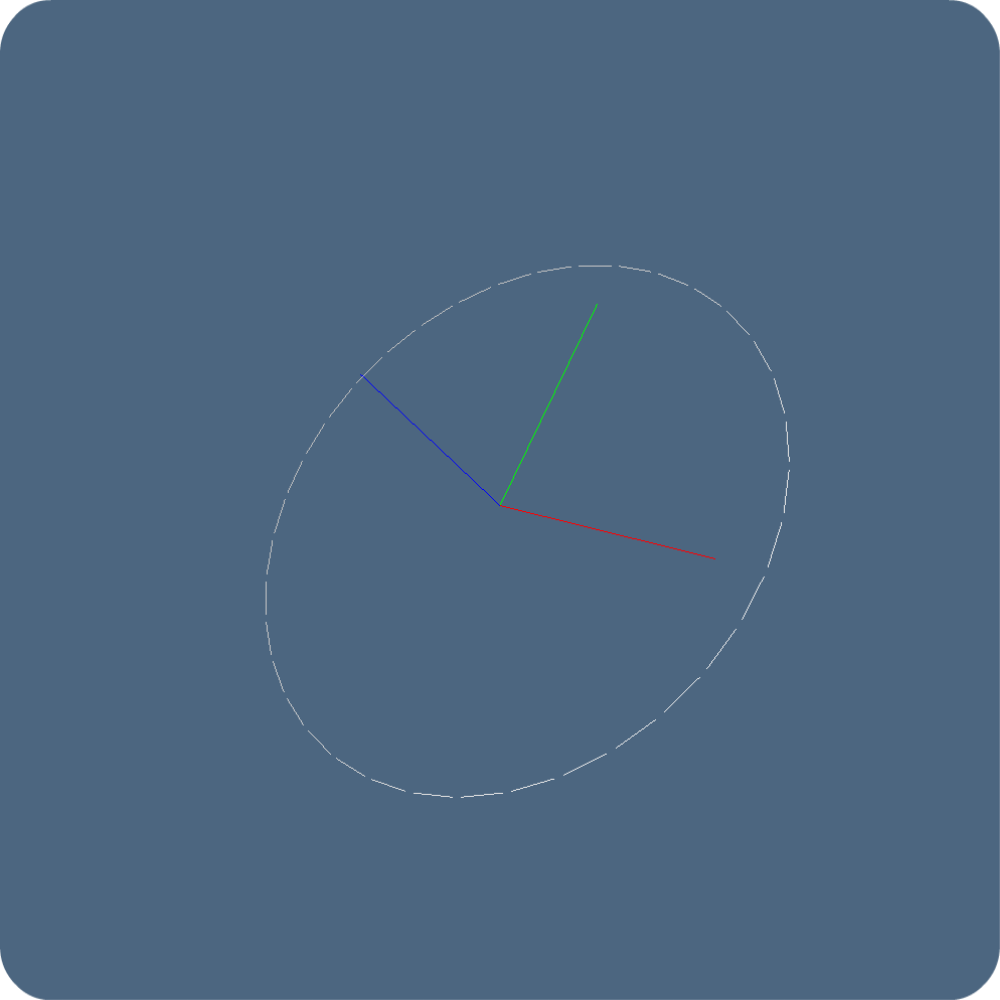
Testata con:

model = larCircle(1)()

VIEW(EXPLODE(1.2,1.2,1.2)(MKPOLS(model)))

Grafo delle chiamate:
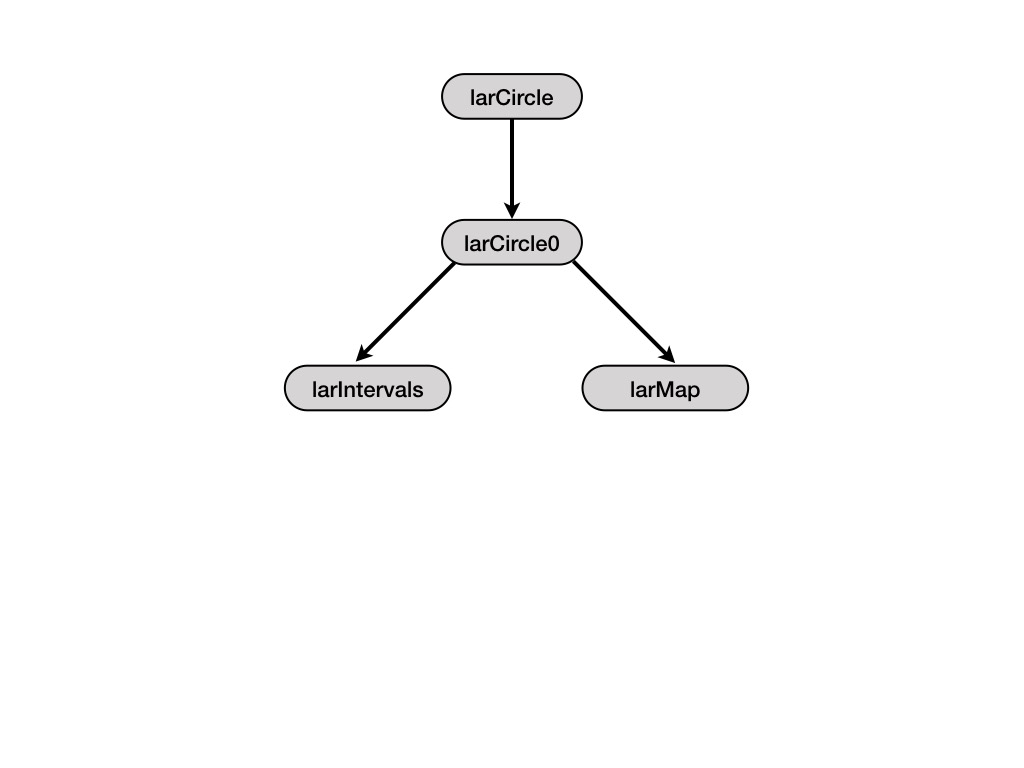

#### ***larHelix***

In [160]:
type(eval("larHelix()()"))


 points = [[0], [1], [2], [3], [4], [5], [6], [7], [8], [9], [10], [11], [12], [13], [14], [15], [16], [17], [18], [19], [20], [21], [22], [23], [24], [25], [26], [27], [28], [29], [30], [31], [32], [33], [34], [35], [36], [37], [38], [39], [40], [41], [42], [43], [44], [45], [46], [47], [48], [49], [50], [51], [52], [53], [54], [55], [56], [57], [58], [59], [60], [61], [62], [63], [64], [65], [66], [67], [68], [69], [70], [71], [72]]

 svect = [0.013888888888888888]

 points = [[0.0], [0.013888888888888888], [0.027777777777777776], [0.041666666666666664], [0.05555555555555555], [0.06944444444444445], [0.08333333333333333], [0.09722222222222221], [0.1111111111111111], [0.125], [0.1388888888888889], [0.15277777777777776], [0.16666666666666666], [0.18055555555555555], [0.19444444444444442], [0.20833333333333331], [0.2222222222222222], [0.2361111111111111], [0.25], [0.2638888888888889], [0.2777777777777778], [0.29166666666666663], [0.3055555555555555], [0.3194444444444444], [0.3333333333

list

La funzione **larHelix** prende in input float e restituisce una lista.
Genera una curva elicoidale con asse z.
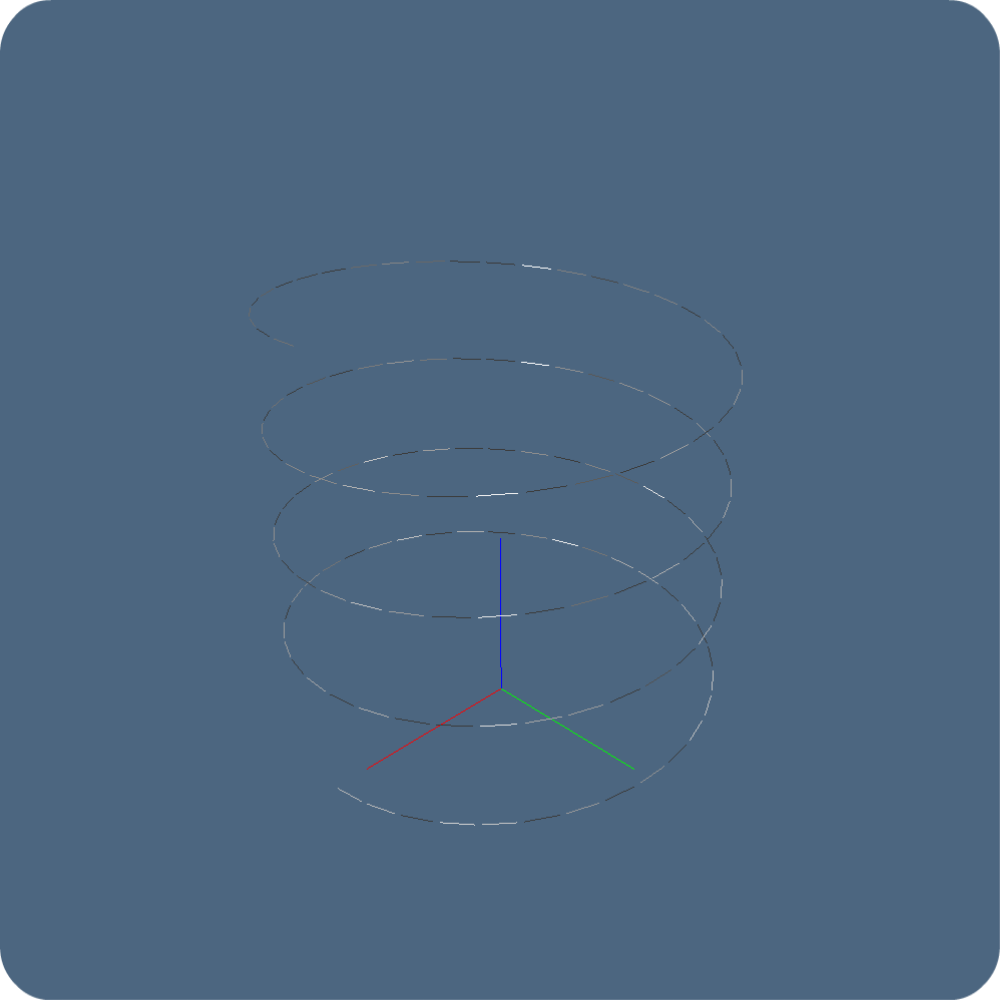
Testata con:

model = larHelix(1,0.5,4)()

VIEW(EXPLODE(1.2,1.2,1.2)(MKPOLS(model)))

Grafo delle chiamate:
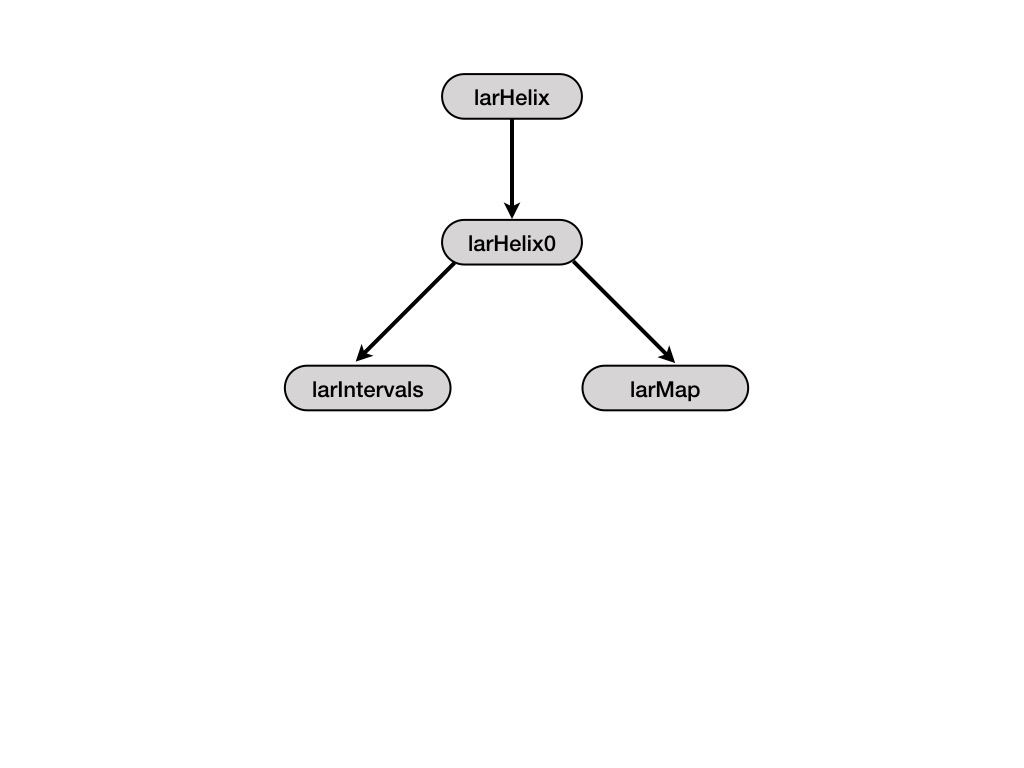

### 2D-Superfici

#### ***larDisk***

In [161]:
type(eval("larDisk()()"))


 points = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [4, 1], [5, 0], [5, 1], [6, 0], [6, 1], [7, 0], [7, 1], [8, 0], [8, 1], [9, 0], [9, 1], [10, 0], [10, 1], [11, 0], [11, 1], [12, 0], [12, 1], [13, 0], [13, 1], [14, 0], [14, 1], [15, 0], [15, 1], [16, 0], [16, 1], [17, 0], [17, 1], [18, 0], [18, 1], [19, 0], [19, 1], [20, 0], [20, 1], [21, 0], [21, 1], [22, 0], [22, 1], [23, 0], [23, 1], [24, 0], [24, 1], [25, 0], [25, 1], [26, 0], [26, 1], [27, 0], [27, 1], [28, 0], [28, 1], [29, 0], [29, 1], [30, 0], [30, 1], [31, 0], [31, 1], [32, 0], [32, 1], [33, 0], [33, 1], [34, 0], [34, 1], [35, 0], [35, 1], [36, 0], [36, 1]]

 svect = [0.027777777777777776, 1.0]

 points = [[0.0, 0.0], [0.0, 1.0], [0.027777777777777776, 0.0], [0.027777777777777776, 1.0], [0.05555555555555555, 0.0], [0.05555555555555555, 1.0], [0.08333333333333333, 0.0], [0.08333333333333333, 1.0], [0.1111111111111111, 0.0], [0.1111111111111111, 1.0], [0.1388888888888889, 0.0], [0.13888888888888

list

In [162]:
type([36,1])

list

La funzione **larDisk** prende in input float nel primo argomento e una lista nel secondo e restituisce una lista. Genera un disco centrato nell'origine.
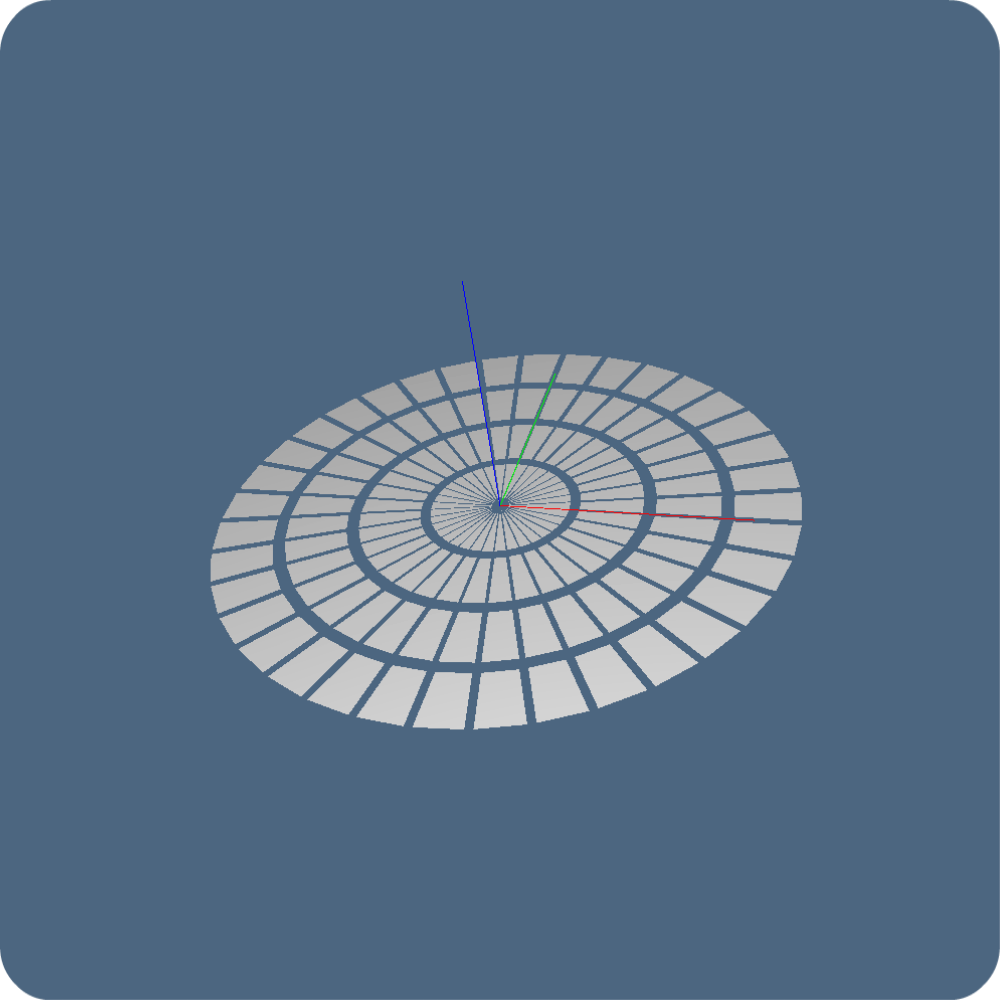
Testata con:

model = larDisk(1)([36,4])

VIEW(EXPLODE(1.2,1.2,1.2)(MKPOLS(model)))

Grafo delle chiamate:
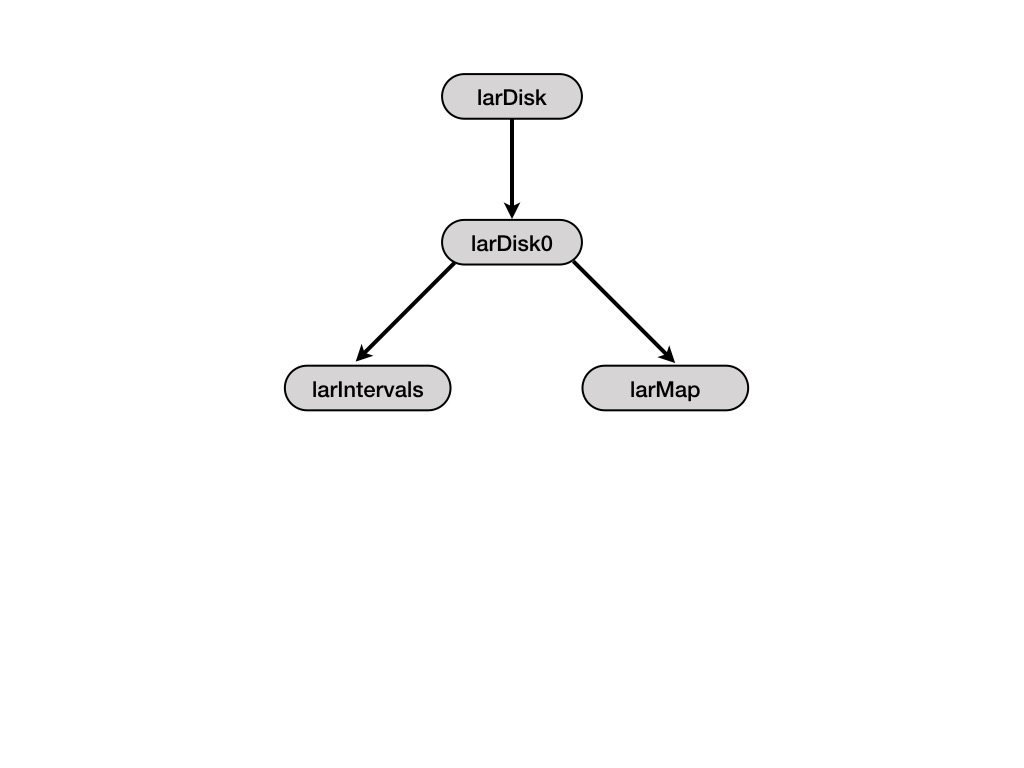

#### ***larHelicoid***

In [163]:
type(eval("larHelicoid()()"))


 points = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [25, 0], [26, 0], [27, 0], [28, 0], [29, 0], [30, 0], [31, 0], [32, 0], [33, 0], [34, 0], [35, 0], [36, 0], [37, 0], [38, 0], [39, 0], [40, 0], [41, 0], [42, 0], [43, 0], [44, 0], [45, 0], [46, 0], [47, 0], [48, 0], [49, 0], [50, 0], [51, 0], [52, 0], [53, 0], [54, 0], [55, 0], [56, 0], [57, 0], [58, 0], [59, 0], [60, 0], [61, 0], [62, 0], [63, 0], [64, 0], [65, 0], [66, 0], [67, 0], [68, 0], [69, 0], [70, 0], [71, 0], [72, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [18, 1], [19, 1], [20, 1], [21, 1], [22, 1], [23, 1], [24, 1], [25, 1], [26, 1], [27, 1], [28, 1], [29, 1], [30, 1], [31, 1], [32, 1], [33, 1], [34, 1], [35, 1], [36, 1], [37, 1], [38, 1], 

list

La funzione **larHelicoid** prende in input float nel primo argomento e una lista nel secondo, restitusce una lista. Genera una superficie elicoidale con asse z. 
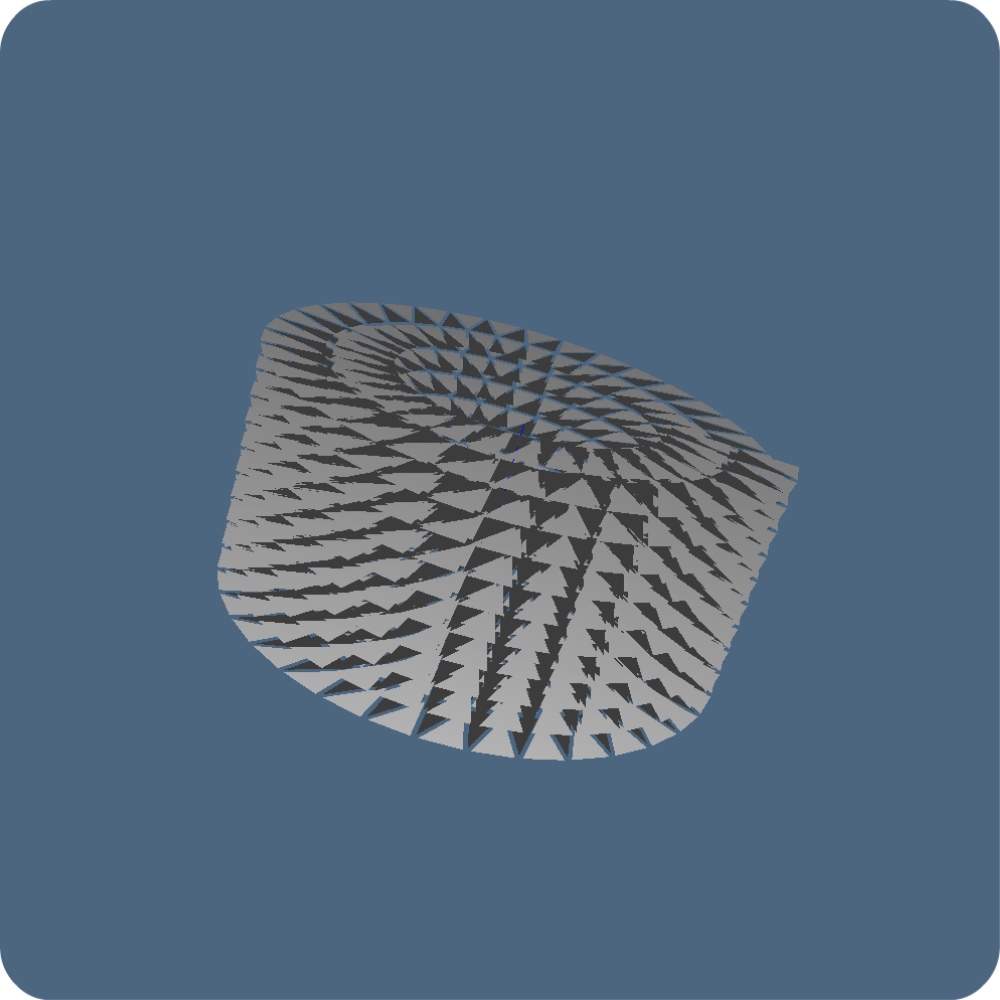

Testata con:

model = larHelicoid(1,0.5,0.1,10)()

VIEW(EXPLODE(1.2,1.2,1.2)(MKPOLS(model)))

Grafo delle chiamate:

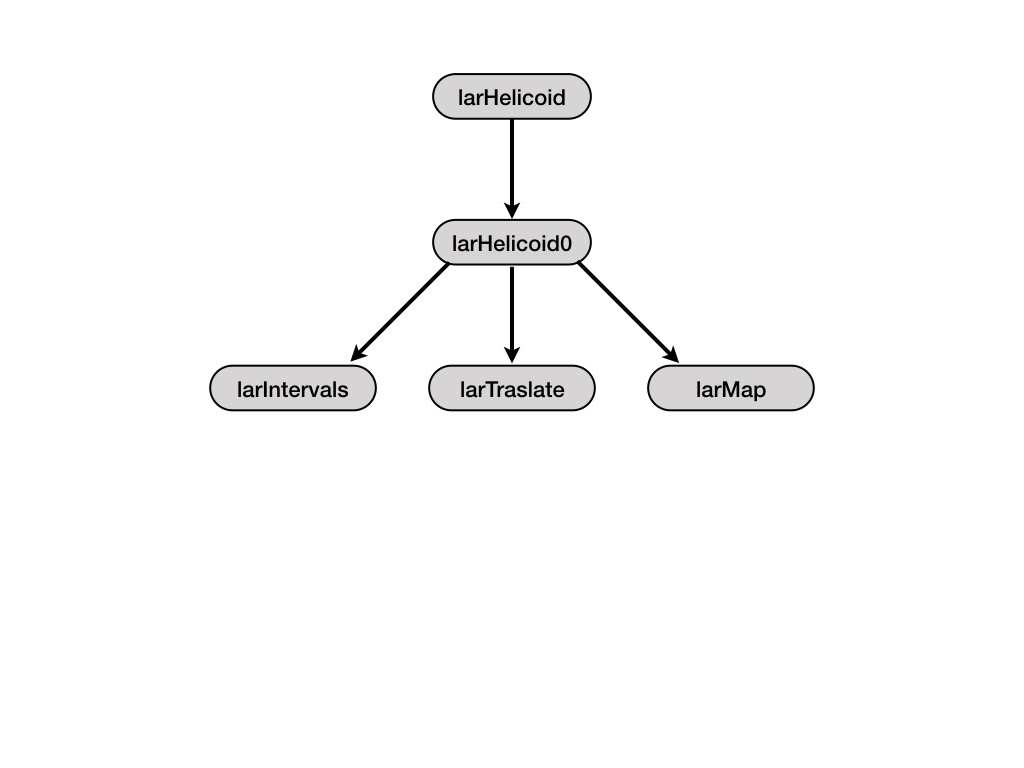

#### ***larRing***

In [164]:
type(eval("larRing(2,1)()"))


 points = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [4, 1], [5, 0], [5, 1], [6, 0], [6, 1], [7, 0], [7, 1], [8, 0], [8, 1], [9, 0], [9, 1], [10, 0], [10, 1], [11, 0], [11, 1], [12, 0], [12, 1], [13, 0], [13, 1], [14, 0], [14, 1], [15, 0], [15, 1], [16, 0], [16, 1], [17, 0], [17, 1], [18, 0], [18, 1], [19, 0], [19, 1], [20, 0], [20, 1], [21, 0], [21, 1], [22, 0], [22, 1], [23, 0], [23, 1], [24, 0], [24, 1], [25, 0], [25, 1], [26, 0], [26, 1], [27, 0], [27, 1], [28, 0], [28, 1], [29, 0], [29, 1], [30, 0], [30, 1], [31, 0], [31, 1], [32, 0], [32, 1], [33, 0], [33, 1], [34, 0], [34, 1], [35, 0], [35, 1], [36, 0], [36, 1]]

 svect = [0.027777777777777776, 1.0]

 points = [[0.0, 0.0], [0.0, 1.0], [0.027777777777777776, 0.0], [0.027777777777777776, 1.0], [0.05555555555555555, 0.0], [0.05555555555555555, 1.0], [0.08333333333333333, 0.0], [0.08333333333333333, 1.0], [0.1111111111111111, 0.0], [0.1111111111111111, 1.0], [0.1388888888888889, 0.0], [0.13888888888888

list

La funzione **larRing** prende in input float nel primo argomento e una lista nel secondo. Restiuisce una lista. Genera un anello centrato nell'origine.
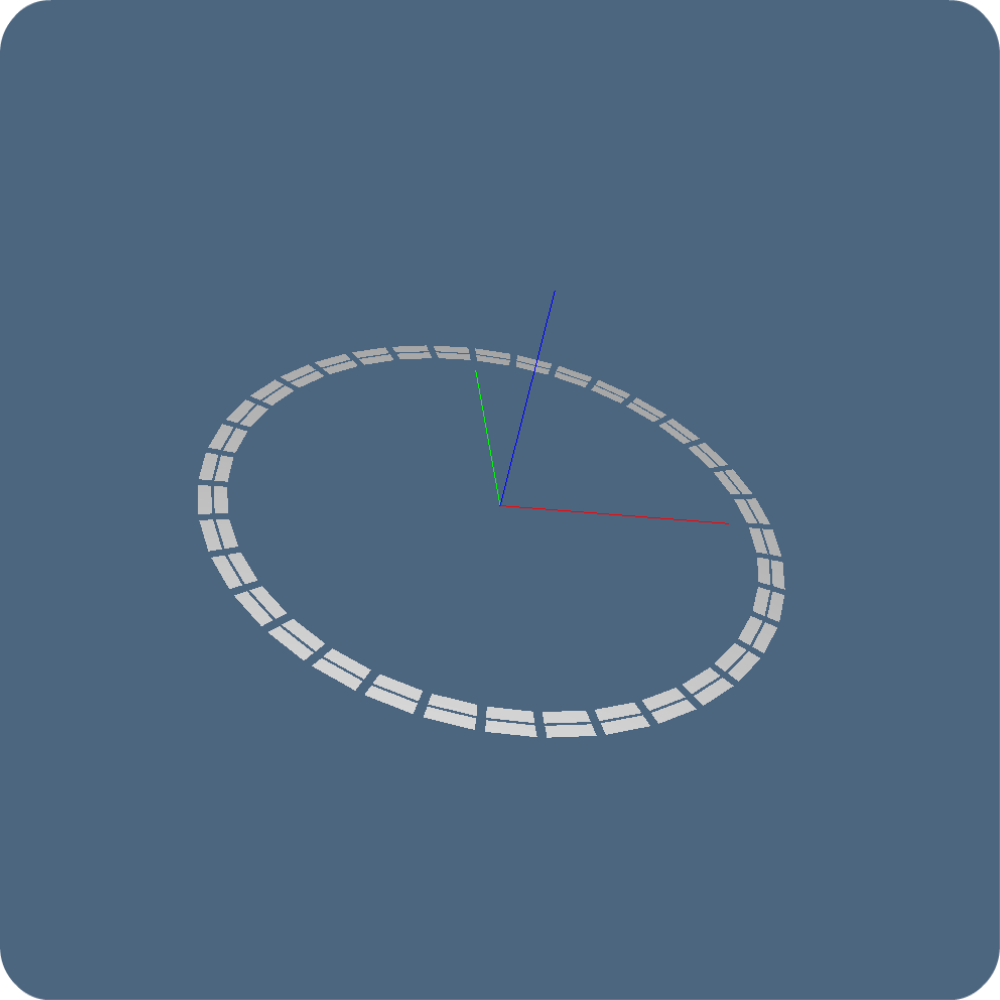

Testata con:

model = larRing(.9, 1.)([36,2])

VIEW(EXPLODE(1.2,1.2,1.2)(MKPOLS(model)))

Grafo delle chiamate:

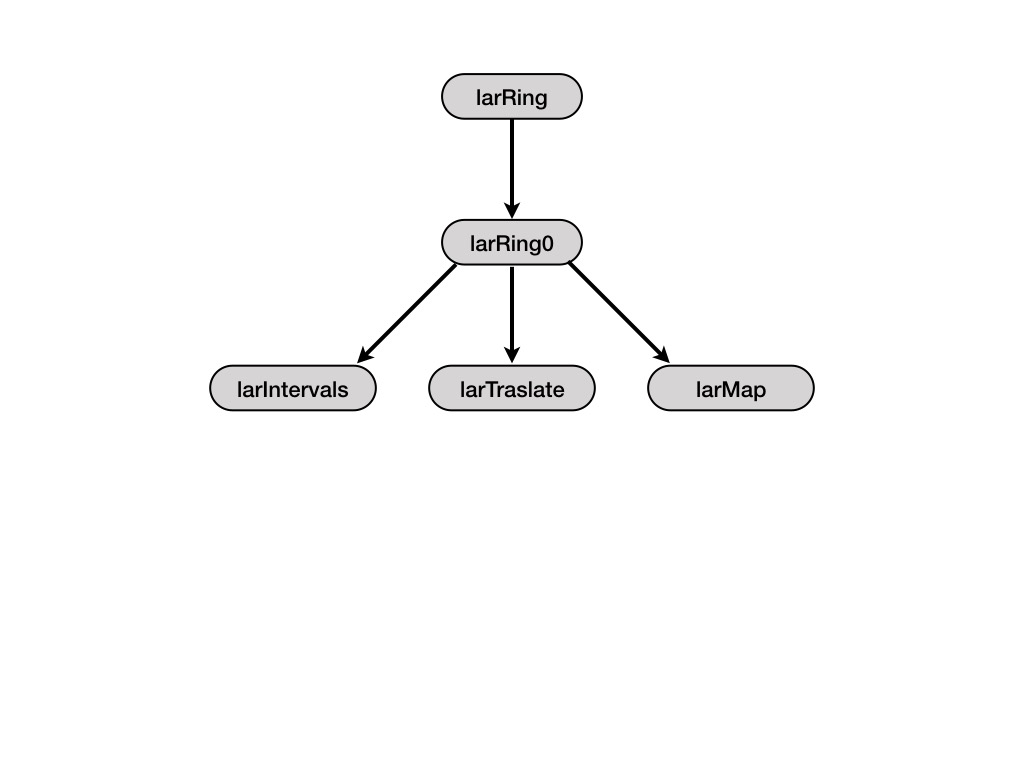

#### ***larSphere***

In [165]:
type(eval("larSphere()()"))


 points = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [18, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2], [11, 2], [12, 2], [13, 2], [14, 2], [15, 2], [16, 2], [17, 2], [18, 2], [0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [9, 3], [10, 3], [11, 3], [12, 3], [13, 3], [14, 3], [15, 3], [16, 3], [17, 3], [18, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [9, 4], [10, 4], [11, 4], [12, 4], [13, 4], [14, 4], [15, 4], [16, 4], [17, 4], [18, 4], [0, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [6, 5], [7, 5], [8, 5], [9, 5], [10, 5], [11, 5], [12, 5], [13, 5], [14, 5], [15, 5], [16, 5], [17, 5], [18, 5], [0, 6], [1, 6], [2, 6]

list

La funzione **larSphere** prende in input float nel primo argomento e una lista nel secondo, restitusce una lista. Genera una sfera centrata nell'origine di raggio dato.
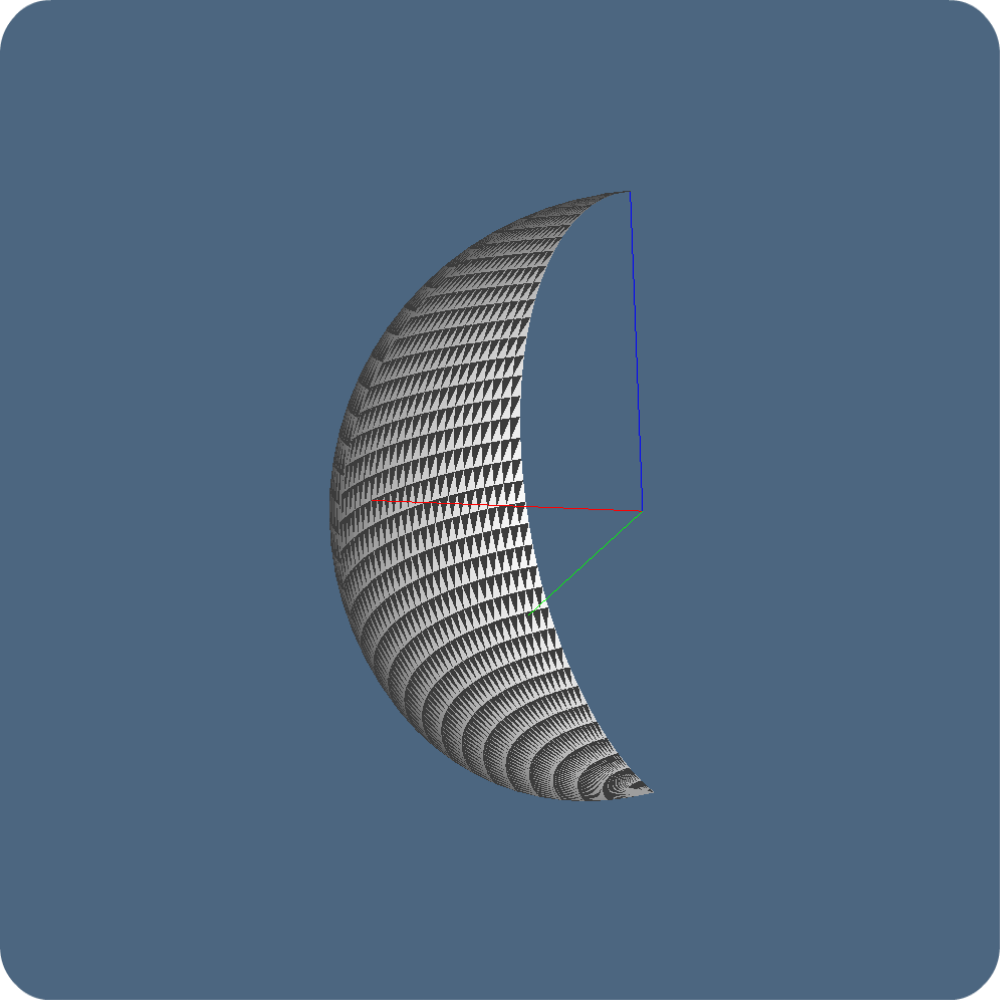

Testata con:

model = larSphere(1,PI,PI/2)([36,36])

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

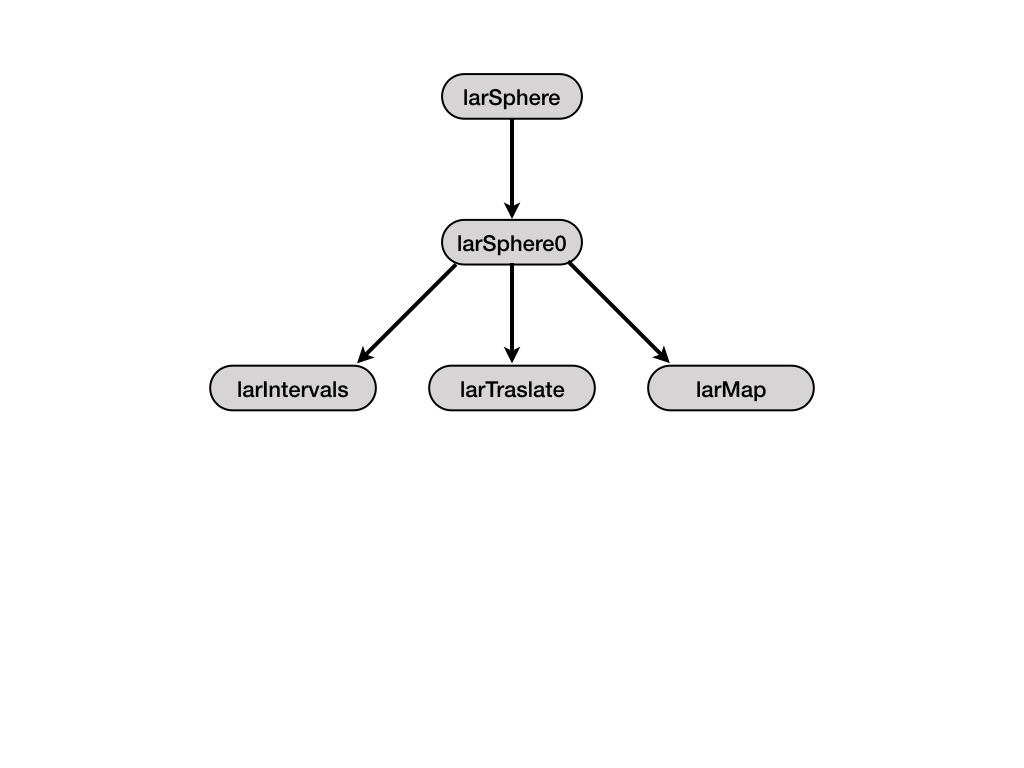

#### ***larCylinder***

In [166]:
type(eval("larCylinder(1,1)()"))


 points = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [4, 1], [5, 0], [5, 1], [6, 0], [6, 1], [7, 0], [7, 1], [8, 0], [8, 1], [9, 0], [9, 1], [10, 0], [10, 1], [11, 0], [11, 1], [12, 0], [12, 1], [13, 0], [13, 1], [14, 0], [14, 1], [15, 0], [15, 1], [16, 0], [16, 1], [17, 0], [17, 1], [18, 0], [18, 1], [19, 0], [19, 1], [20, 0], [20, 1], [21, 0], [21, 1], [22, 0], [22, 1], [23, 0], [23, 1], [24, 0], [24, 1], [25, 0], [25, 1], [26, 0], [26, 1], [27, 0], [27, 1], [28, 0], [28, 1], [29, 0], [29, 1], [30, 0], [30, 1], [31, 0], [31, 1], [32, 0], [32, 1], [33, 0], [33, 1], [34, 0], [34, 1], [35, 0], [35, 1], [36, 0], [36, 1]]

 svect = [0.027777777777777776, 1.0]

 points = [[0.0, 0.0], [0.0, 1.0], [0.027777777777777776, 0.0], [0.027777777777777776, 1.0], [0.05555555555555555, 0.0], [0.05555555555555555, 1.0], [0.08333333333333333, 0.0], [0.08333333333333333, 1.0], [0.1111111111111111, 0.0], [0.1111111111111111, 1.0], [0.1388888888888889, 0.0], [0.13888888888888

list

La funzione **larCylinder** prende in input float nel primo argomento e una lista nel secondo. Restituisce una lista. Genera un cilindro.
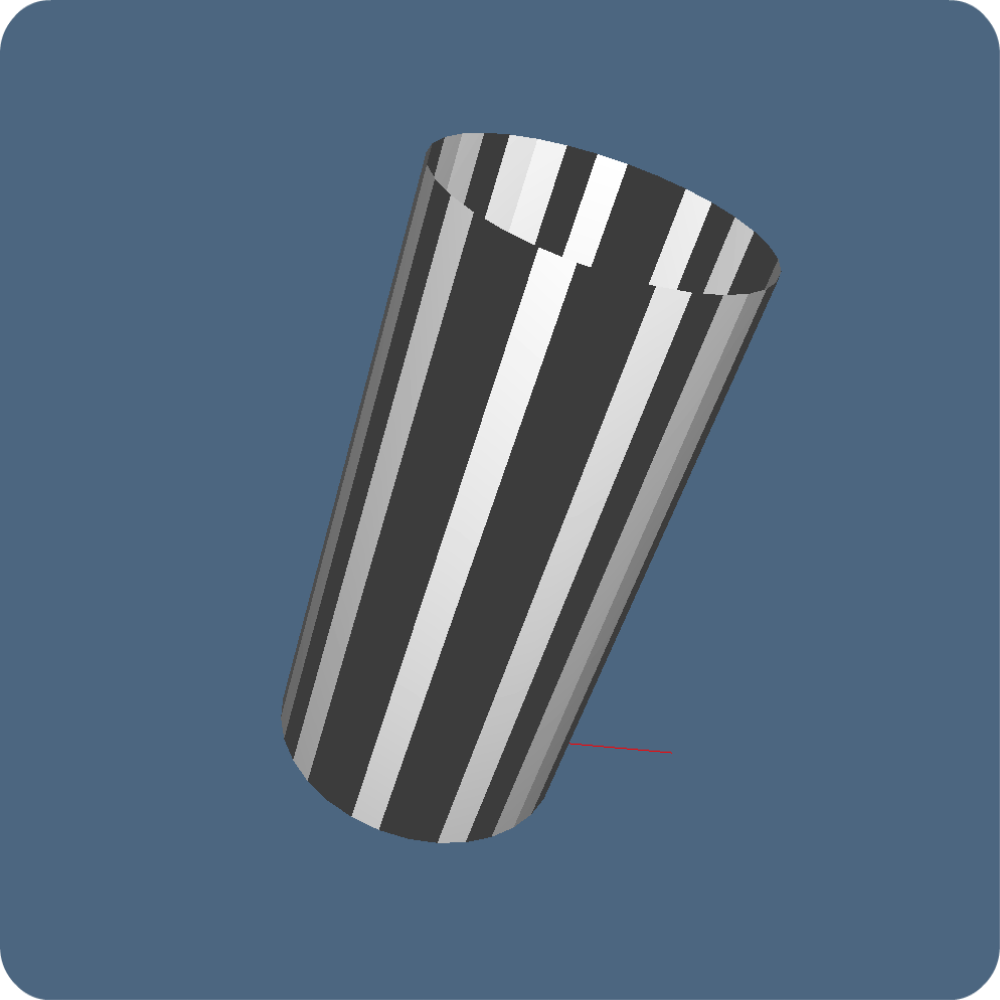
Testata con:

model = larCylinder(.5,2.)([32,1])

VIEW(STRUCT(MKPOLS(model)))

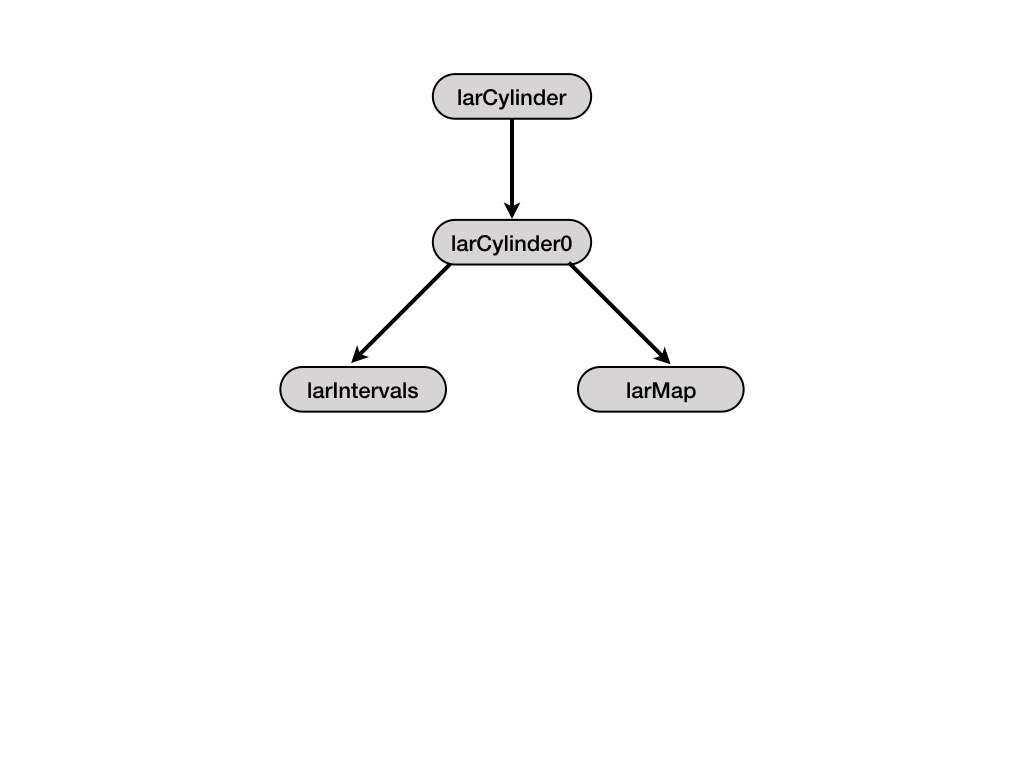

#### ***larToroidal***

In [167]:
type(eval("larToroidal(1,1)()"))


 points = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [18, 1], [19, 1], [20, 1], [21, 1], [22, 1], [23, 1], [24, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2], [11, 2], [12, 2], [13, 2], [14, 2], [15, 2], [16, 2], [17, 2], [18, 2], [19, 2], [20, 2], [21, 2], [22, 2], [23, 2], [24, 2], [0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [9, 3], [10, 3], [11, 3], [12, 3], [13, 3], [14, 3], [15, 3], [16, 3], [17, 3], [18, 3], [19, 3], [20, 3], [21, 3], [22, 3], [23, 3], [24, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [9, 4], [10, 4], [11, 4], [12, 4], [13, 4], [14, 4], [15

list

La funzione **larToroidal** prende in input float nel primo argomento e una lista nel secondo, restitusce una lista. Genera una superficie toroidale di raggi dati.
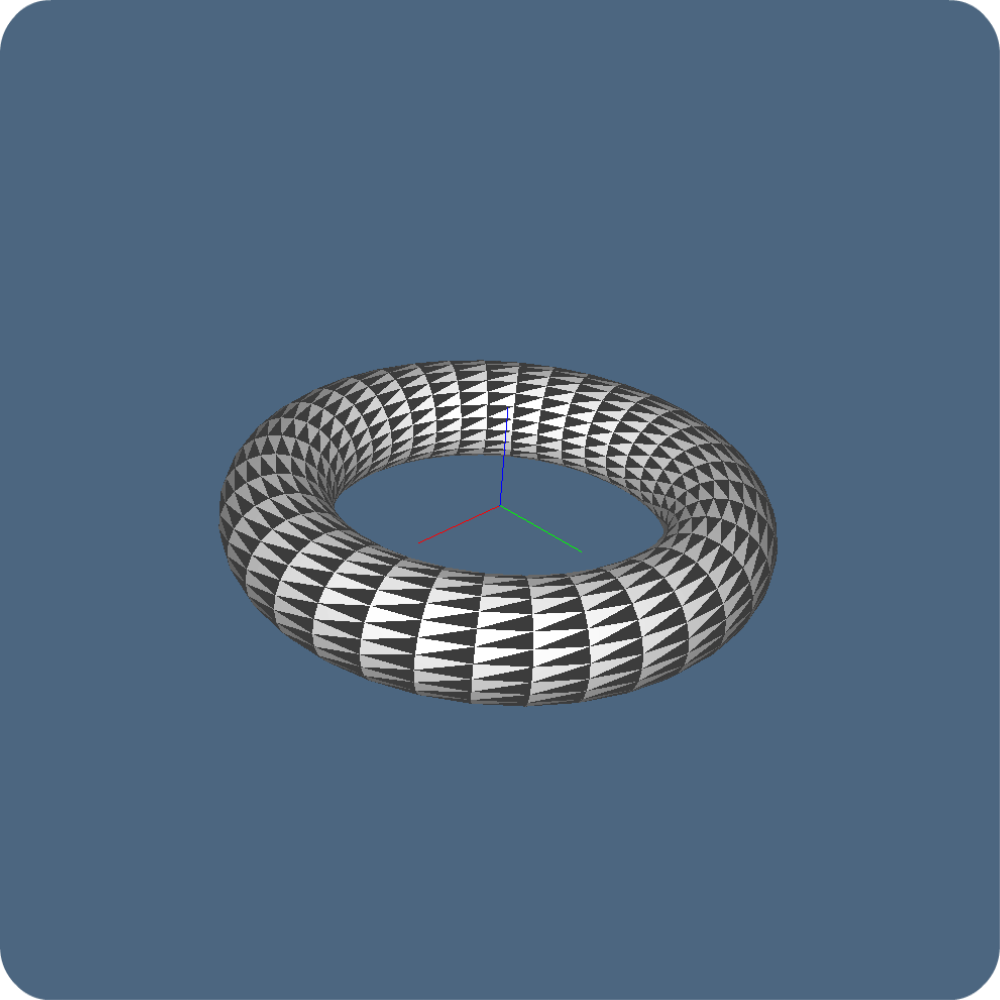
Testata con:

model = larToroidal(0.5,2)()

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

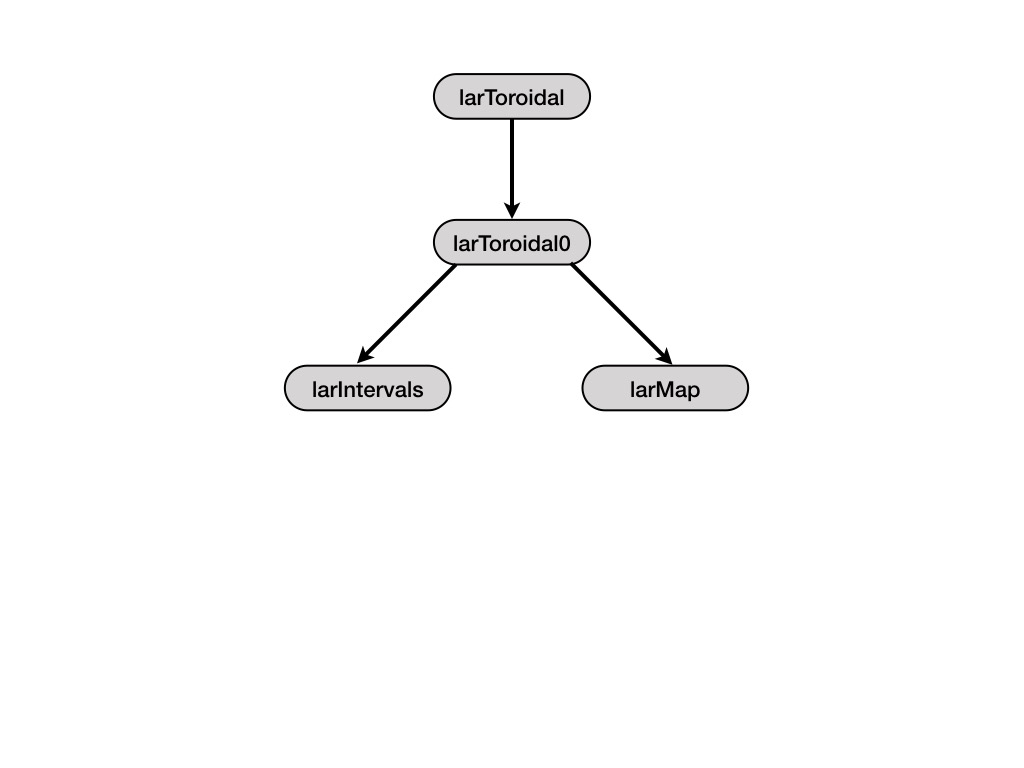

#### ***larCrown***

In [168]:
type(eval("larCrown(1,1)()"))


 points = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [18, 1], [19, 1], [20, 1], [21, 1], [22, 1], [23, 1], [24, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2], [11, 2], [12, 2], [13, 2], [14, 2], [15, 2], [16, 2], [17, 2], [18, 2], [19, 2], [20, 2], [21, 2], [22, 2], [23, 2], [24, 2], [0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [9, 3], [10, 3], [11, 3], [12, 3], [13, 3], [14, 3], [15, 3], [16, 3], [17, 3], [18, 3], [19, 3], [20, 3], [21, 3], [22, 3], [23, 3], [24, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [9, 4], [10, 4], [11, 4], [12, 4], [13, 4], [14, 4], [15

list

La superficie **larCrown** prende in input float nel primo argomento e una lista nel secondo, restitusce una lista.
Genera una superficie semi-toroidale di raggio dato.
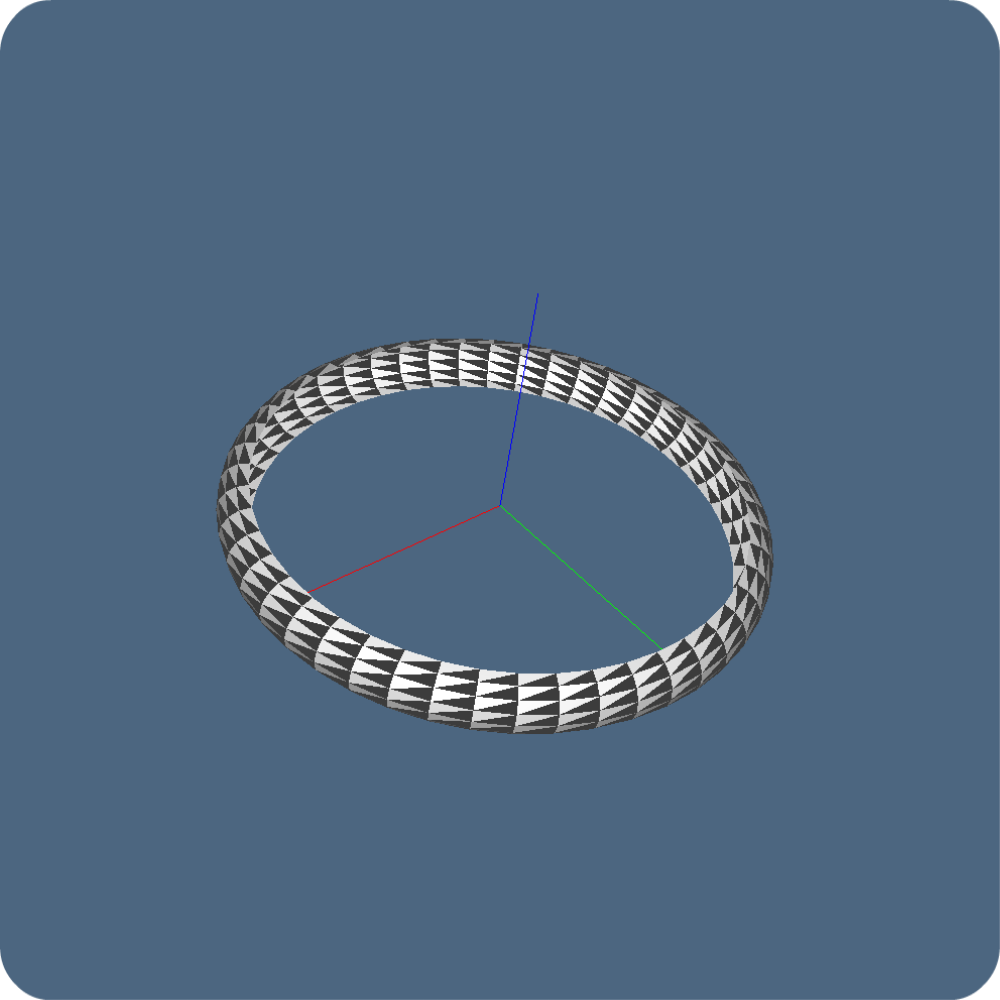

Testata con:

model = larCrown(0.125,1)([8,48])

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

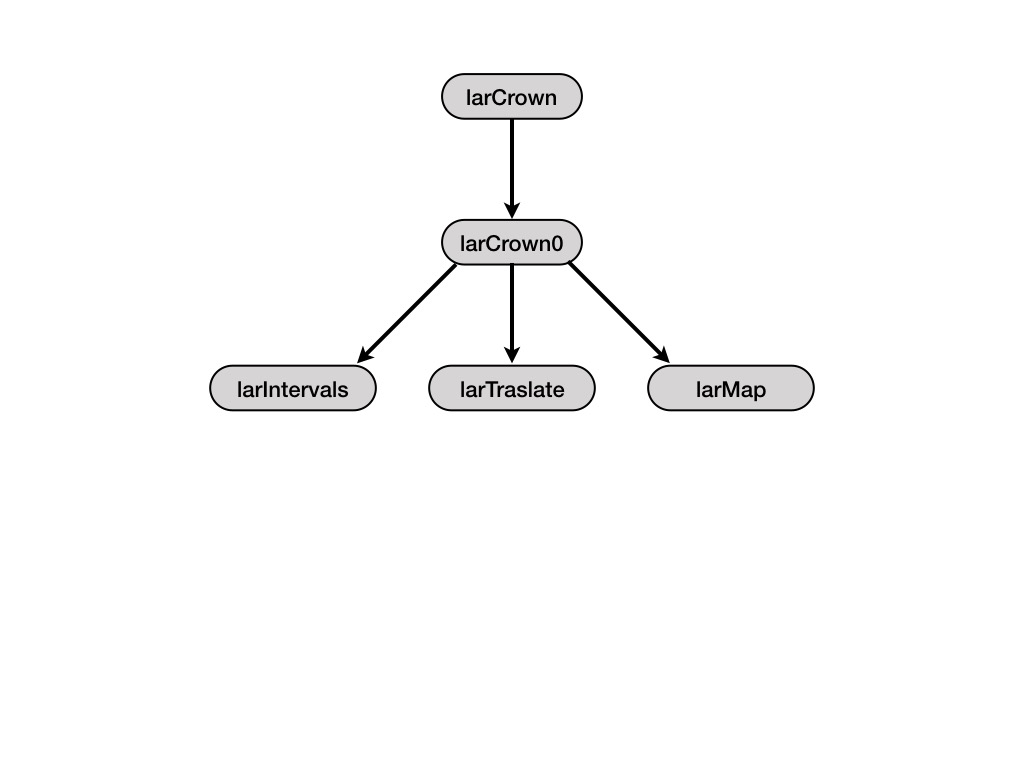

### 3D-Solidi

#### ***larBox***

In [169]:
type(eval("[1,1],[2,2]"))

tuple

La funzione **larBox** prende in input due vettori e restiruisce una tupla. Genera un parallelepipedo rettagolo (solid box).
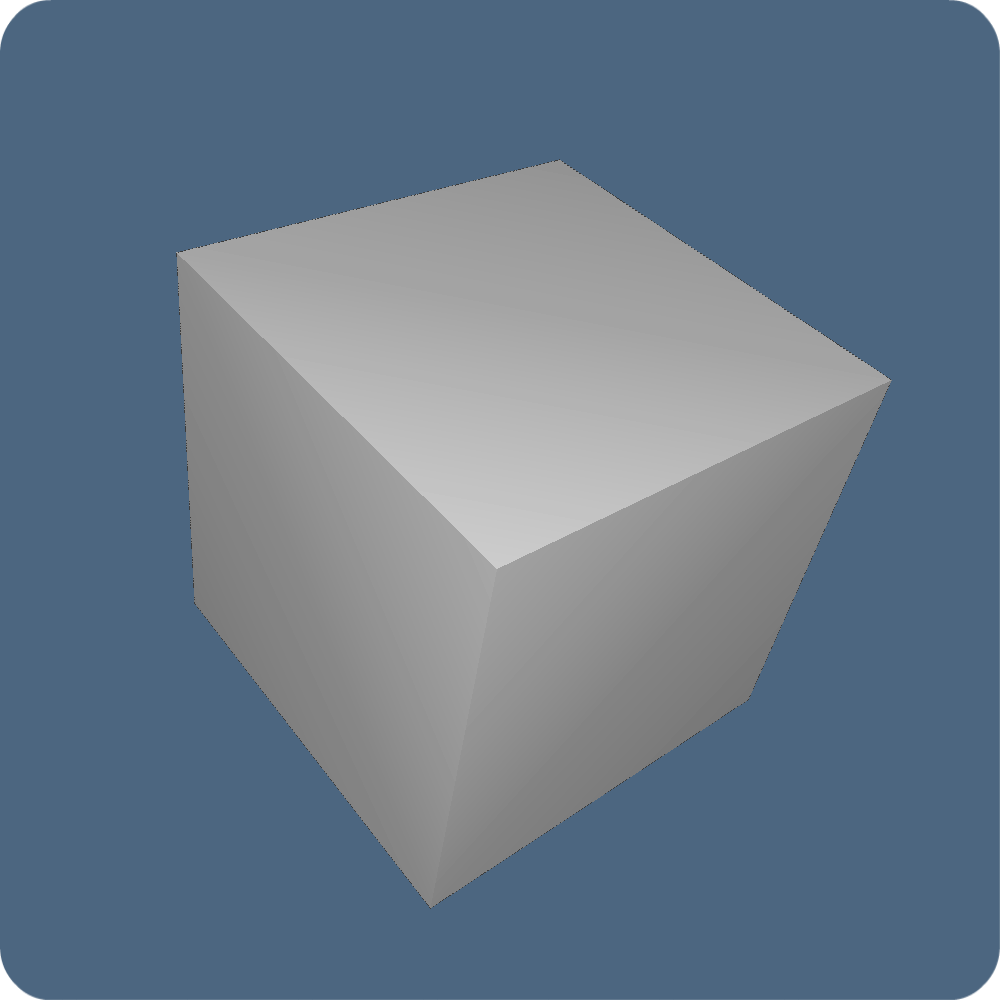

Testata con:

model = larBox([-1,-1,-1],[1,1,1])

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

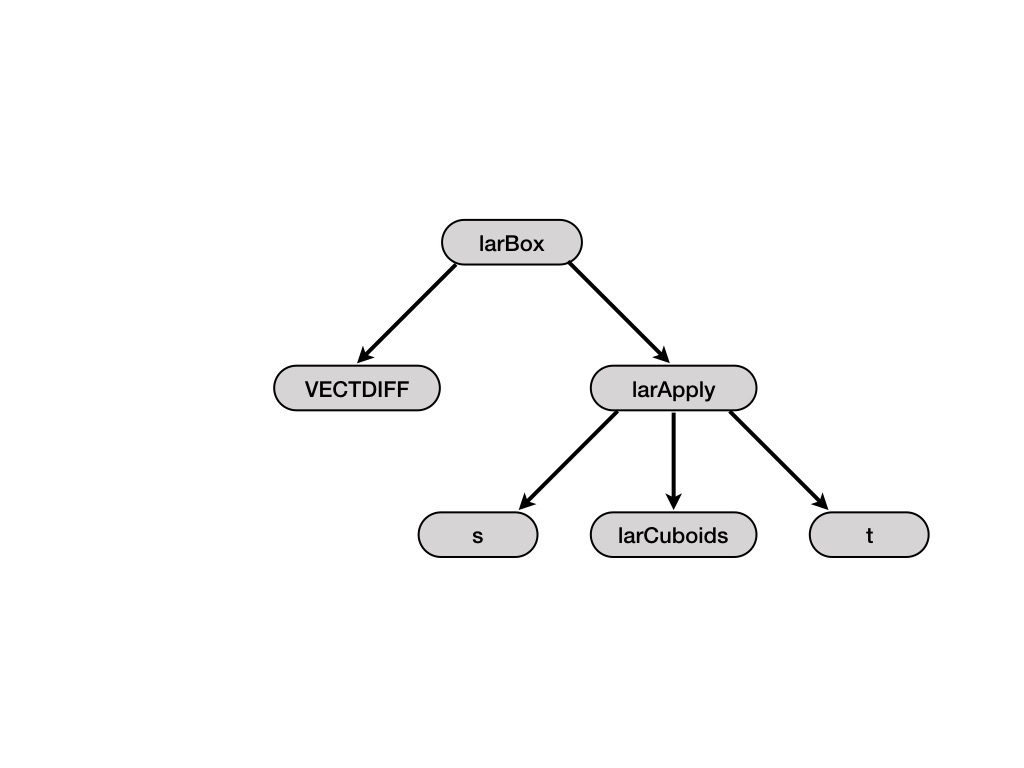

#### ***larBall***

In [170]:
type(eval("larBall()()"))


 points = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [18, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2], [11, 2], [12, 2], [13, 2], [14, 2], [15, 2], [16, 2], [17, 2], [18, 2], [0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [9, 3], [10, 3], [11, 3], [12, 3], [13, 3], [14, 3], [15, 3], [16, 3], [17, 3], [18, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [9, 4], [10, 4], [11, 4], [12, 4], [13, 4], [14, 4], [15, 4], [16, 4], [17, 4], [18, 4], [0, 5], [1, 5], [2, 5], [3, 5], [4, 5], [5, 5], [6, 5], [7, 5], [8, 5], [9, 5], [10, 5], [11, 5], [12, 5], [13, 5], [14, 5], [15, 5], [16, 5], [17, 5], [18, 5], [0, 6], [1, 6], [2, 6]

tuple

La funzione ***larBall*** prende in input float nel primo argomento e una lista nel secondo. Restituisce una tupla. Genera una palla di raggio dato. 
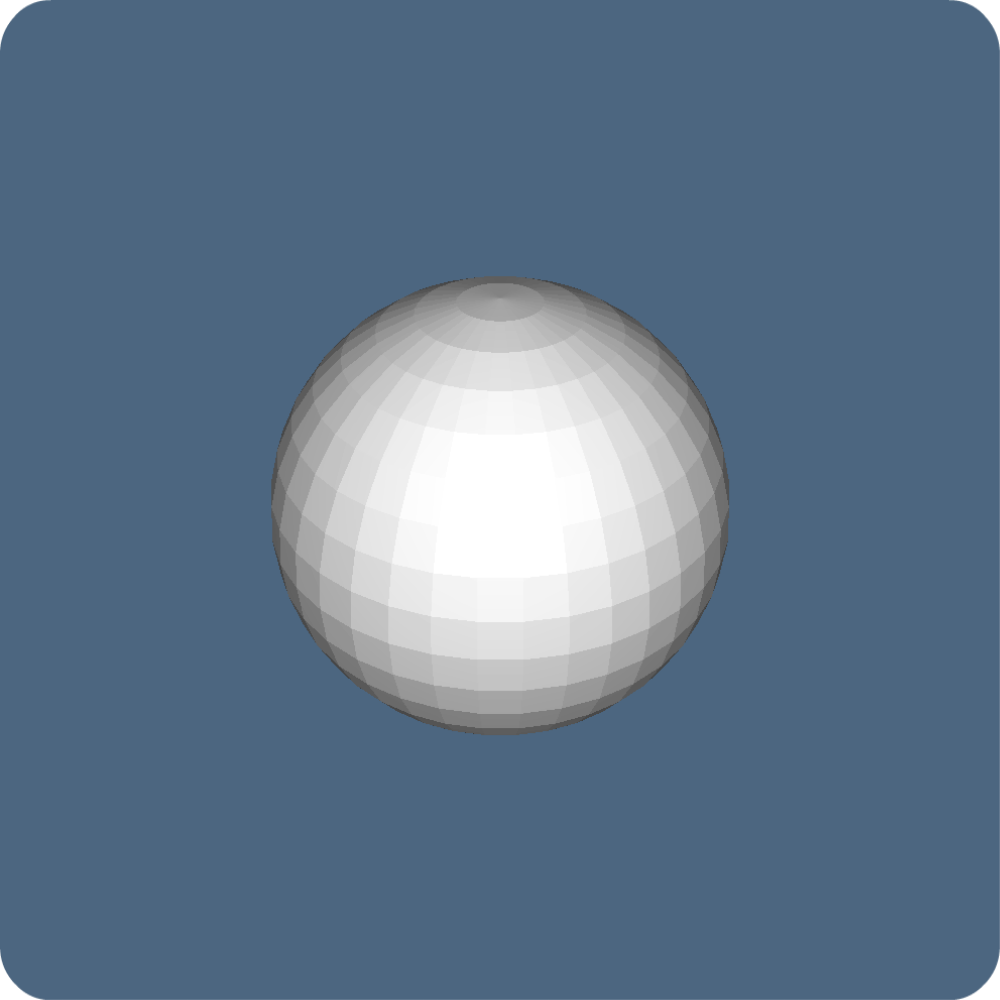

Testata con:

model = larBall(1)()

VIEW(EXPLODE(1.2,1.2,1.2)(MKPOLS(model)))

Grafo delle chiamate:

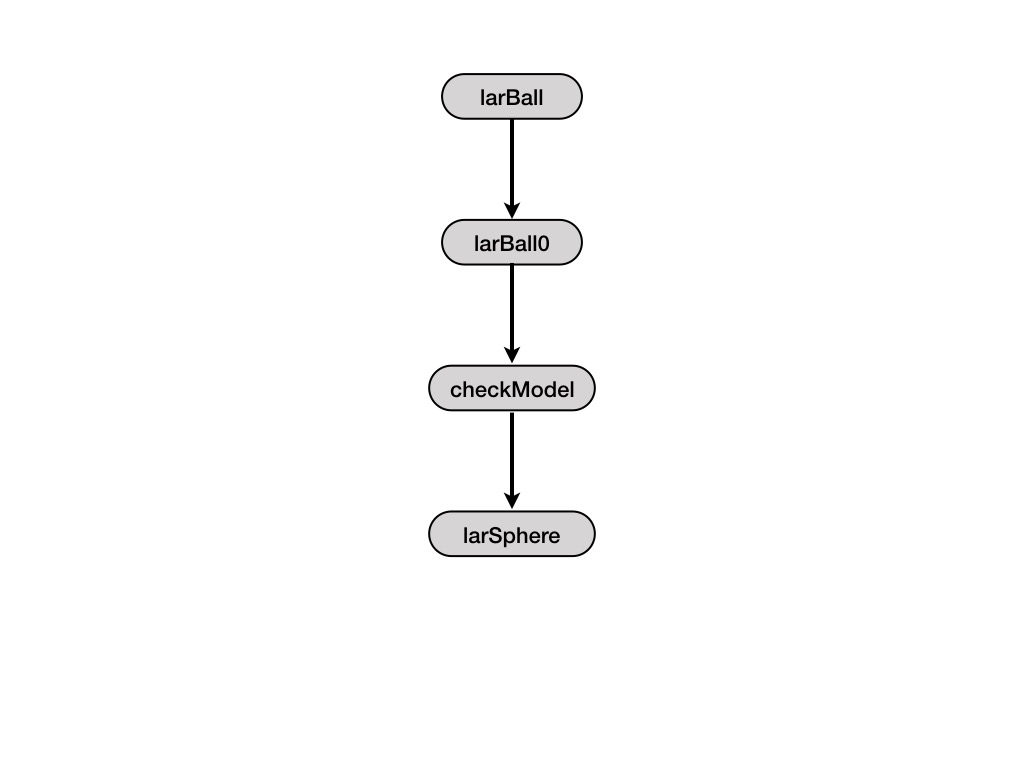

#### **larRod**

In [171]:
type(eval("larRod(1,2)()"))


 points = [[0, 0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1], [3, 0], [3, 1], [4, 0], [4, 1], [5, 0], [5, 1], [6, 0], [6, 1], [7, 0], [7, 1], [8, 0], [8, 1], [9, 0], [9, 1], [10, 0], [10, 1], [11, 0], [11, 1], [12, 0], [12, 1], [13, 0], [13, 1], [14, 0], [14, 1], [15, 0], [15, 1], [16, 0], [16, 1], [17, 0], [17, 1], [18, 0], [18, 1], [19, 0], [19, 1], [20, 0], [20, 1], [21, 0], [21, 1], [22, 0], [22, 1], [23, 0], [23, 1], [24, 0], [24, 1], [25, 0], [25, 1], [26, 0], [26, 1], [27, 0], [27, 1], [28, 0], [28, 1], [29, 0], [29, 1], [30, 0], [30, 1], [31, 0], [31, 1], [32, 0], [32, 1], [33, 0], [33, 1], [34, 0], [34, 1], [35, 0], [35, 1], [36, 0], [36, 1]]

 svect = [0.027777777777777776, 1.0]

 points = [[0.0, 0.0], [0.0, 1.0], [0.027777777777777776, 0.0], [0.027777777777777776, 1.0], [0.05555555555555555, 0.0], [0.05555555555555555, 1.0], [0.08333333333333333, 0.0], [0.08333333333333333, 1.0], [0.1111111111111111, 0.0], [0.1111111111111111, 1.0], [0.1388888888888889, 0.0], [0.13888888888888

tuple

La funzione **larRod** prende in input float nel primo argomento e una lista nel secondo. Restituisce una tupla. Genera un'asta solida.
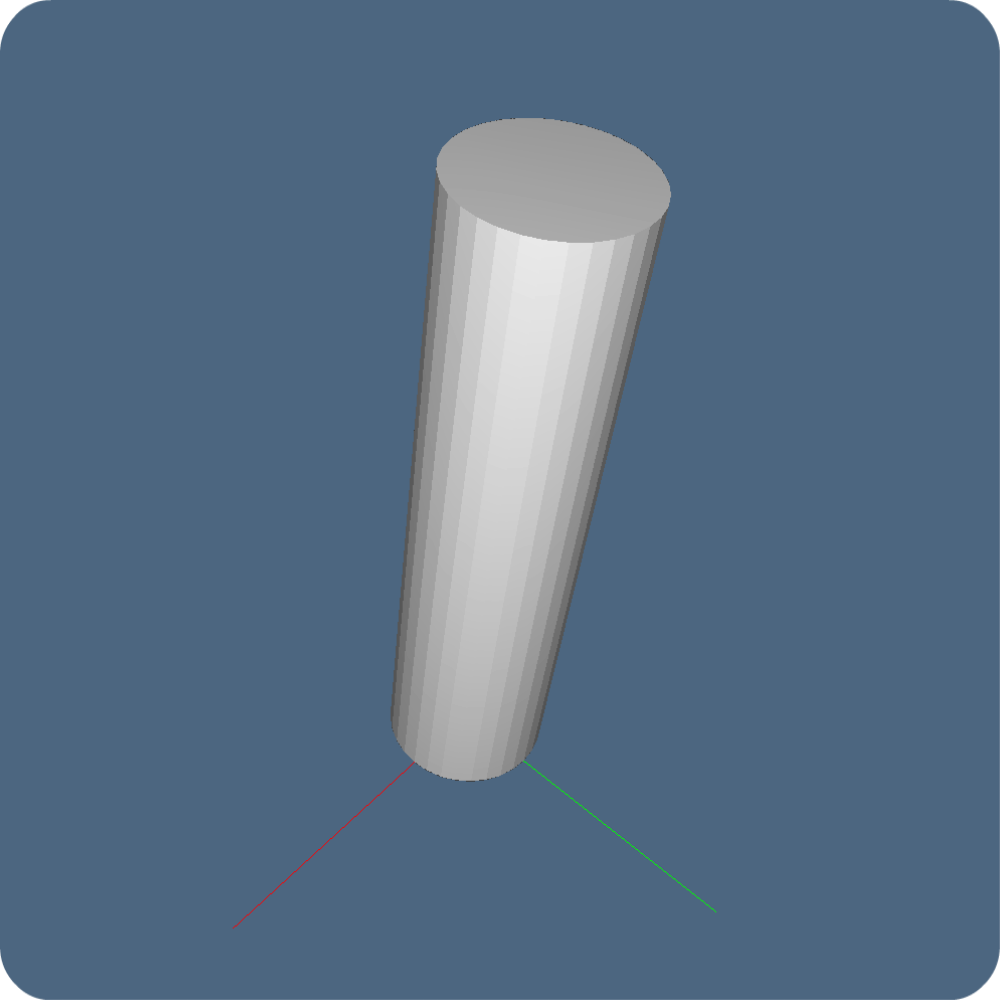
Testata con:

model = larRod(.25,2.)([32,1])

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

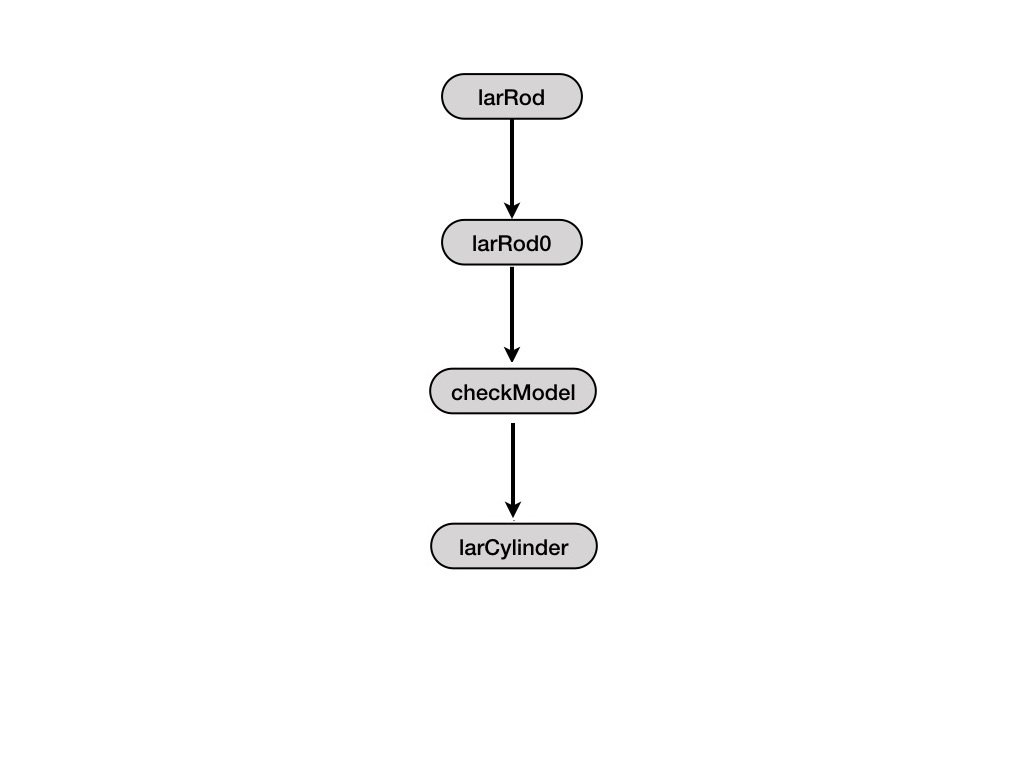

#### **larTorus**

In [172]:
type(eval("larTorus(1,1)()"))


 points = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [0, 2, 0], [0, 2, 1], [0, 3, 0], [0, 3, 1], [0, 4, 0], [0, 4, 1], [0, 5, 0], [0, 5, 1], [0, 6, 0], [0, 6, 1], [0, 7, 0], [0, 7, 1], [0, 8, 0], [0, 8, 1], [0, 9, 0], [0, 9, 1], [0, 10, 0], [0, 10, 1], [0, 11, 0], [0, 11, 1], [0, 12, 0], [0, 12, 1], [0, 13, 0], [0, 13, 1], [0, 14, 0], [0, 14, 1], [0, 15, 0], [0, 15, 1], [0, 16, 0], [0, 16, 1], [0, 17, 0], [0, 17, 1], [0, 18, 0], [0, 18, 1], [0, 19, 0], [0, 19, 1], [0, 20, 0], [0, 20, 1], [0, 21, 0], [0, 21, 1], [0, 22, 0], [0, 22, 1], [0, 23, 0], [0, 23, 1], [0, 24, 0], [0, 24, 1], [0, 25, 0], [0, 25, 1], [0, 26, 0], [0, 26, 1], [0, 27, 0], [0, 27, 1], [0, 28, 0], [0, 28, 1], [0, 29, 0], [0, 29, 1], [0, 30, 0], [0, 30, 1], [0, 31, 0], [0, 31, 1], [0, 32, 0], [0, 32, 1], [0, 33, 0], [0, 33, 1], [0, 34, 0], [0, 34, 1], [0, 35, 0], [0, 35, 1], [0, 36, 0], [0, 36, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1], [1, 2, 0], [1, 2, 1], [1, 3, 0], [1, 3, 1], [1, 4, 0], [1, 4, 1], [1, 5, 0],

list

La funzione **larTorus** prende in input float nel primo argomento e una lista nel secondo. Restituisce una lista. Genera un toro solido.
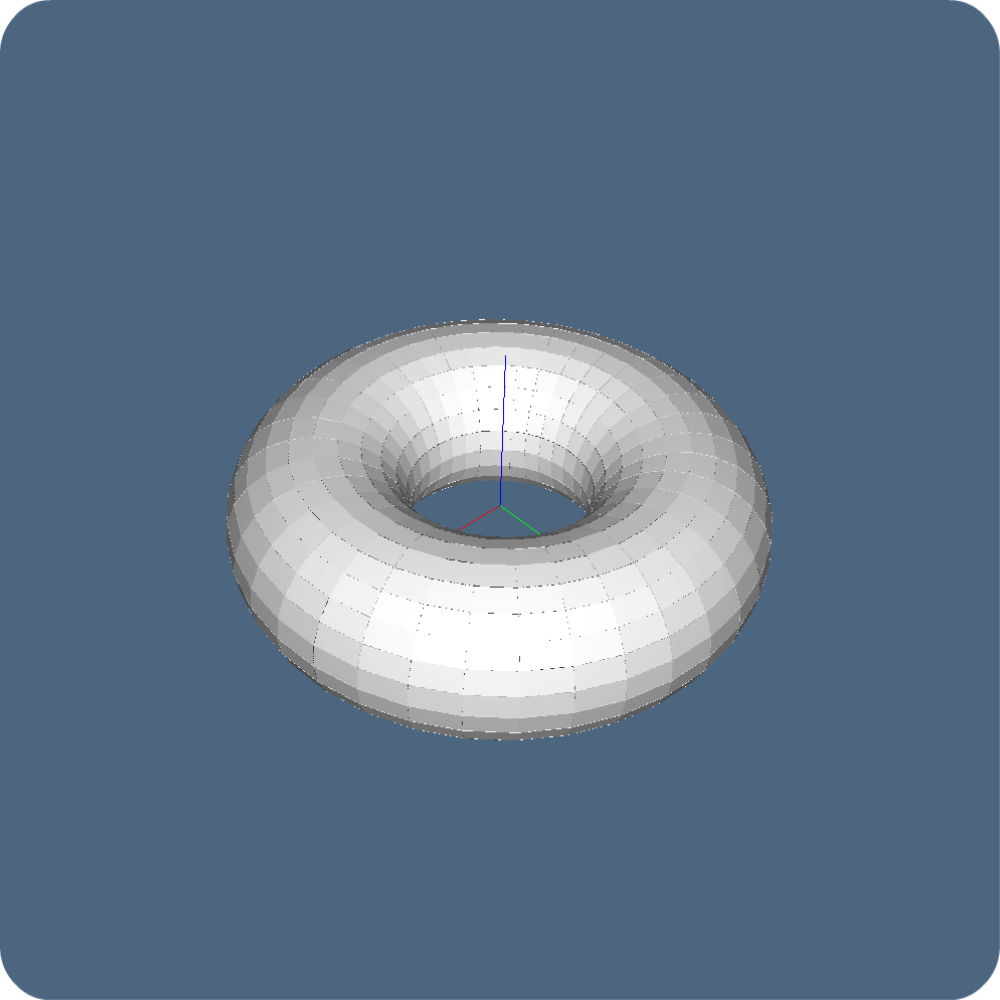
Testata con:

model = larTorus(0.5,1)()

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

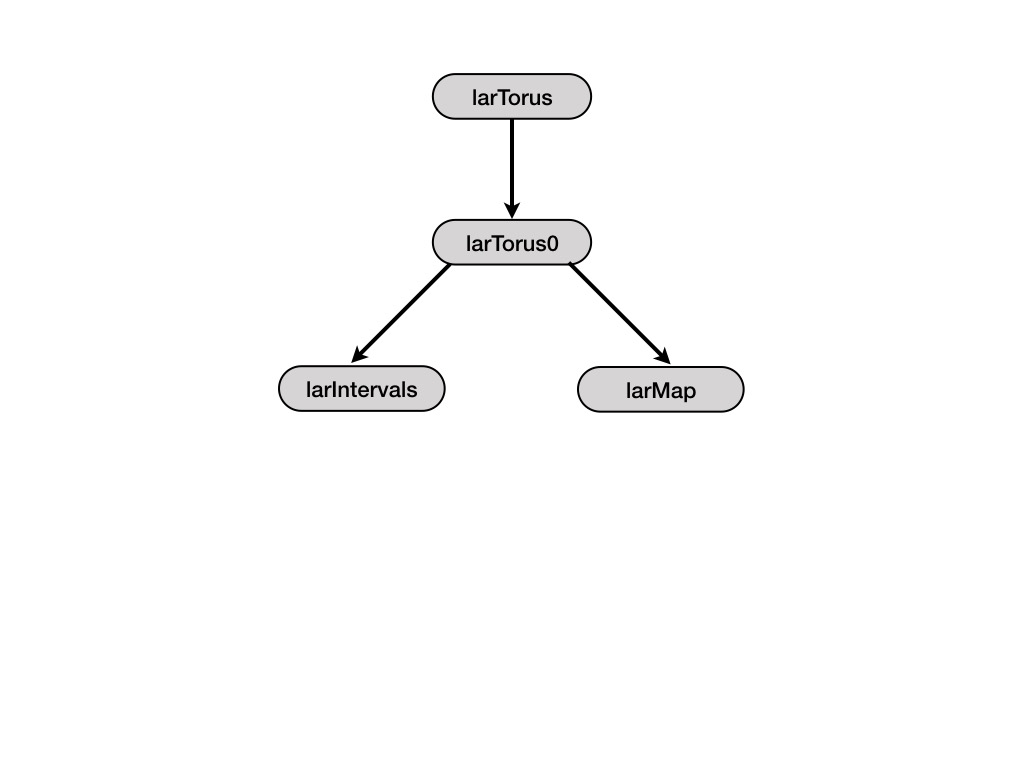

#### **larPizza**

In [173]:
type(eval("larPizza(1,1,PI/2)()"))


 points = [[0, 0], [1, 0], [2, 0], [3, 0], [4, 0], [5, 0], [6, 0], [7, 0], [8, 0], [9, 0], [10, 0], [11, 0], [12, 0], [13, 0], [14, 0], [15, 0], [16, 0], [17, 0], [18, 0], [19, 0], [20, 0], [21, 0], [22, 0], [23, 0], [24, 0], [0, 1], [1, 1], [2, 1], [3, 1], [4, 1], [5, 1], [6, 1], [7, 1], [8, 1], [9, 1], [10, 1], [11, 1], [12, 1], [13, 1], [14, 1], [15, 1], [16, 1], [17, 1], [18, 1], [19, 1], [20, 1], [21, 1], [22, 1], [23, 1], [24, 1], [0, 2], [1, 2], [2, 2], [3, 2], [4, 2], [5, 2], [6, 2], [7, 2], [8, 2], [9, 2], [10, 2], [11, 2], [12, 2], [13, 2], [14, 2], [15, 2], [16, 2], [17, 2], [18, 2], [19, 2], [20, 2], [21, 2], [22, 2], [23, 2], [24, 2], [0, 3], [1, 3], [2, 3], [3, 3], [4, 3], [5, 3], [6, 3], [7, 3], [8, 3], [9, 3], [10, 3], [11, 3], [12, 3], [13, 3], [14, 3], [15, 3], [16, 3], [17, 3], [18, 3], [19, 3], [20, 3], [21, 3], [22, 3], [23, 3], [24, 3], [0, 4], [1, 4], [2, 4], [3, 4], [4, 4], [5, 4], [6, 4], [7, 4], [8, 4], [9, 4], [10, 4], [11, 4], [12, 4], [13, 4], [14, 4], [15

tuple

La funzione **larPizza** prende in input float nel primo argomento e una lista nel secondo. Restituisce una tupla. Genera un trancio di pizza solido. 
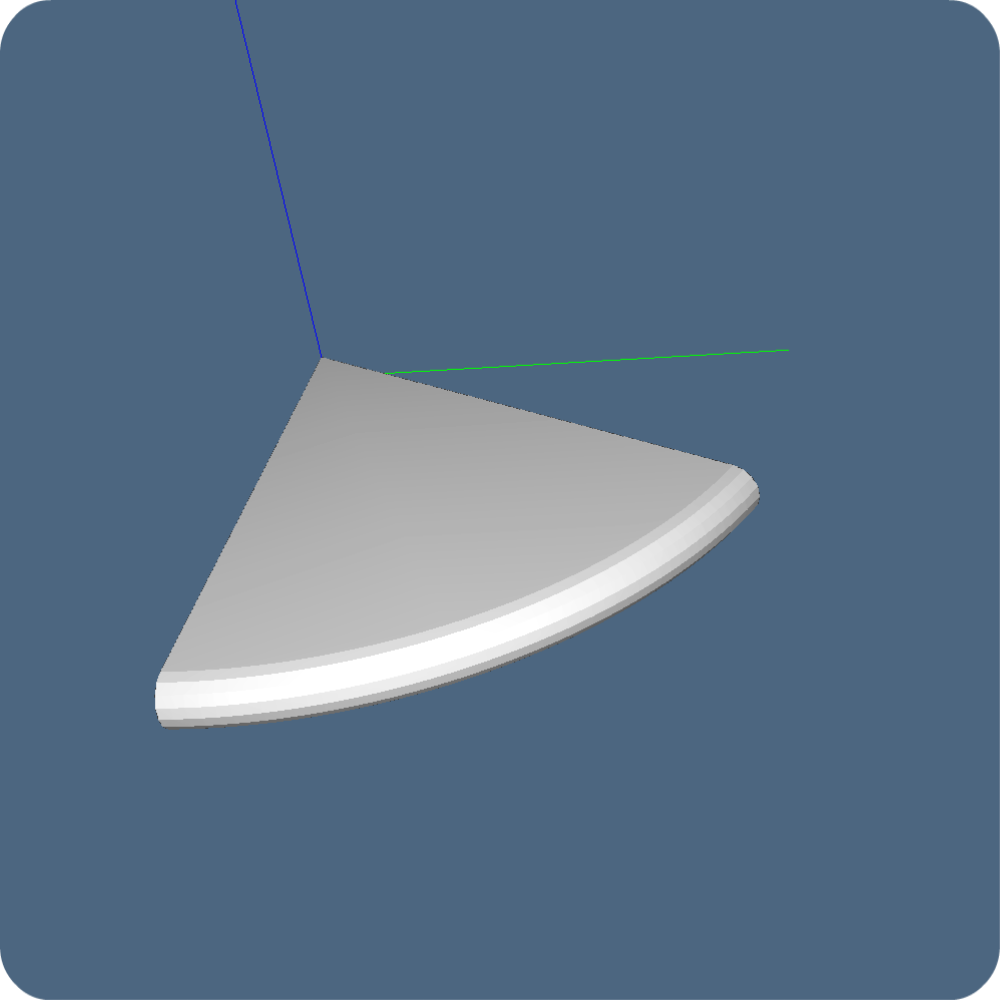
Testata con:

model = larPizza(0.05,1,PI/3)([8,48])

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

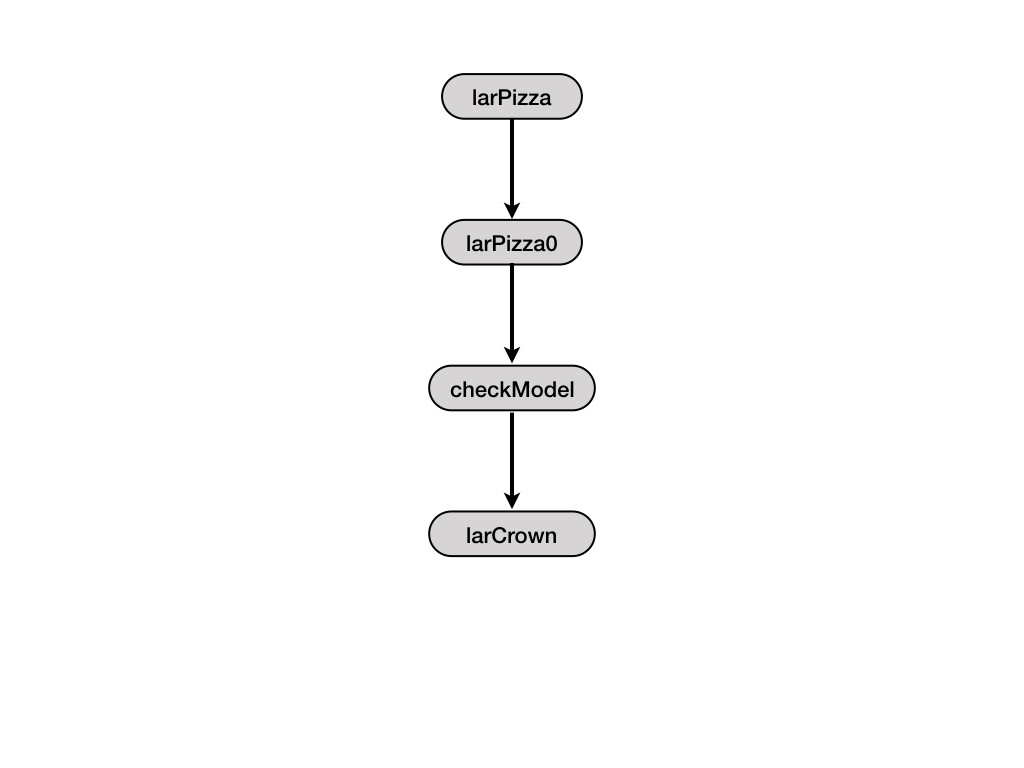

#### **larHallowCyl**

In [174]:
type(eval("larHollowCyl(1,1,2*PI)()"))


 points = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1], [2, 0, 0], [2, 0, 1], [2, 1, 0], [2, 1, 1], [3, 0, 0], [3, 0, 1], [3, 1, 0], [3, 1, 1], [4, 0, 0], [4, 0, 1], [4, 1, 0], [4, 1, 1], [5, 0, 0], [5, 0, 1], [5, 1, 0], [5, 1, 1], [6, 0, 0], [6, 0, 1], [6, 1, 0], [6, 1, 1], [7, 0, 0], [7, 0, 1], [7, 1, 0], [7, 1, 1], [8, 0, 0], [8, 0, 1], [8, 1, 0], [8, 1, 1], [9, 0, 0], [9, 0, 1], [9, 1, 0], [9, 1, 1], [10, 0, 0], [10, 0, 1], [10, 1, 0], [10, 1, 1], [11, 0, 0], [11, 0, 1], [11, 1, 0], [11, 1, 1], [12, 0, 0], [12, 0, 1], [12, 1, 0], [12, 1, 1], [13, 0, 0], [13, 0, 1], [13, 1, 0], [13, 1, 1], [14, 0, 0], [14, 0, 1], [14, 1, 0], [14, 1, 1], [15, 0, 0], [15, 0, 1], [15, 1, 0], [15, 1, 1], [16, 0, 0], [16, 0, 1], [16, 1, 0], [16, 1, 1], [17, 0, 0], [17, 0, 1], [17, 1, 0], [17, 1, 1], [18, 0, 0], [18, 0, 1], [18, 1, 0], [18, 1, 1], [19, 0, 0], [19, 0, 1], [19, 1, 0], [19, 1, 1], [20, 0, 0], [20, 0, 1], [20, 1, 0], [20, 1, 1], [21, 0, 0], [21, 0, 

list

La funzione **larHollowCyl** prende in input float nel primo argomento e una lista nel secondo. Restituisce una liste. Genera un cilindro solido bucato.
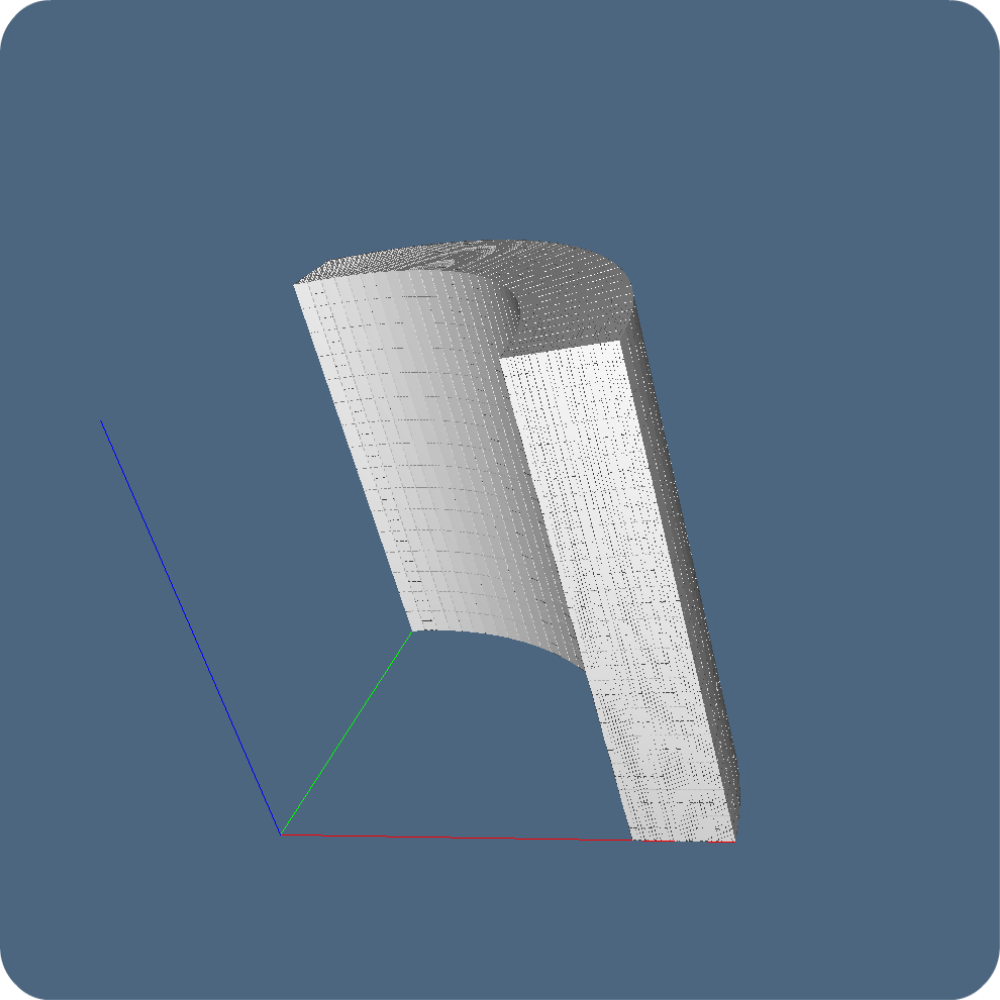
Testata con: 

model = larHollowCyl(0.8,1,1,angle=PI/2)([32,32,32])

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

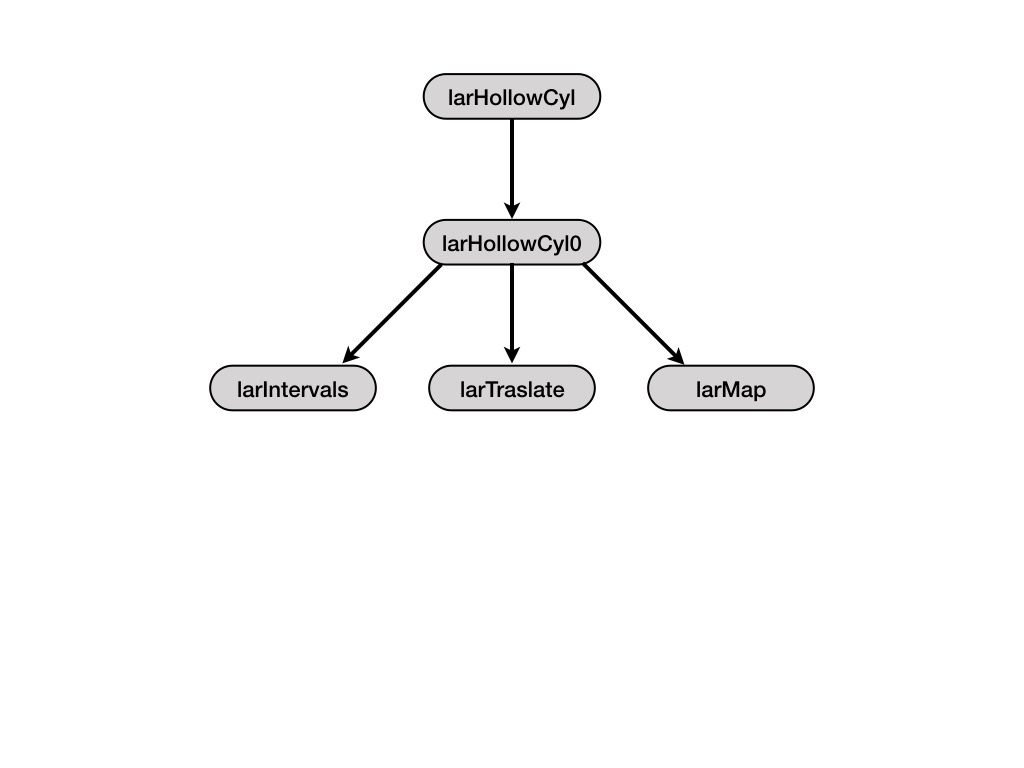

#### **larHollowSphere**

In [175]:
type(eval("larHollowSphere(1,1)()"))


 points = [[0, 0, 0], [0, 0, 1], [0, 1, 0], [0, 1, 1], [1, 0, 0], [1, 0, 1], [1, 1, 0], [1, 1, 1], [2, 0, 0], [2, 0, 1], [2, 1, 0], [2, 1, 1], [3, 0, 0], [3, 0, 1], [3, 1, 0], [3, 1, 1], [4, 0, 0], [4, 0, 1], [4, 1, 0], [4, 1, 1], [5, 0, 0], [5, 0, 1], [5, 1, 0], [5, 1, 1], [6, 0, 0], [6, 0, 1], [6, 1, 0], [6, 1, 1], [7, 0, 0], [7, 0, 1], [7, 1, 0], [7, 1, 1], [8, 0, 0], [8, 0, 1], [8, 1, 0], [8, 1, 1], [9, 0, 0], [9, 0, 1], [9, 1, 0], [9, 1, 1], [10, 0, 0], [10, 0, 1], [10, 1, 0], [10, 1, 1], [11, 0, 0], [11, 0, 1], [11, 1, 0], [11, 1, 1], [12, 0, 0], [12, 0, 1], [12, 1, 0], [12, 1, 1], [13, 0, 0], [13, 0, 1], [13, 1, 0], [13, 1, 1], [14, 0, 0], [14, 0, 1], [14, 1, 0], [14, 1, 1], [15, 0, 0], [15, 0, 1], [15, 1, 0], [15, 1, 1], [16, 0, 0], [16, 0, 1], [16, 1, 0], [16, 1, 1], [17, 0, 0], [17, 0, 1], [17, 1, 0], [17, 1, 1], [18, 0, 0], [18, 0, 1], [18, 1, 0], [18, 1, 1], [19, 0, 0], [19, 0, 1], [19, 1, 0], [19, 1, 1], [20, 0, 0], [20, 0, 1], [20, 1, 0], [20, 1, 1], [21, 0, 0], [21, 0, 

list

La funzione **larHollowSphere** prende in input float nel primo argomento e una lista nel secondo. Restituisce una lista. Genera una sfera solida cava.
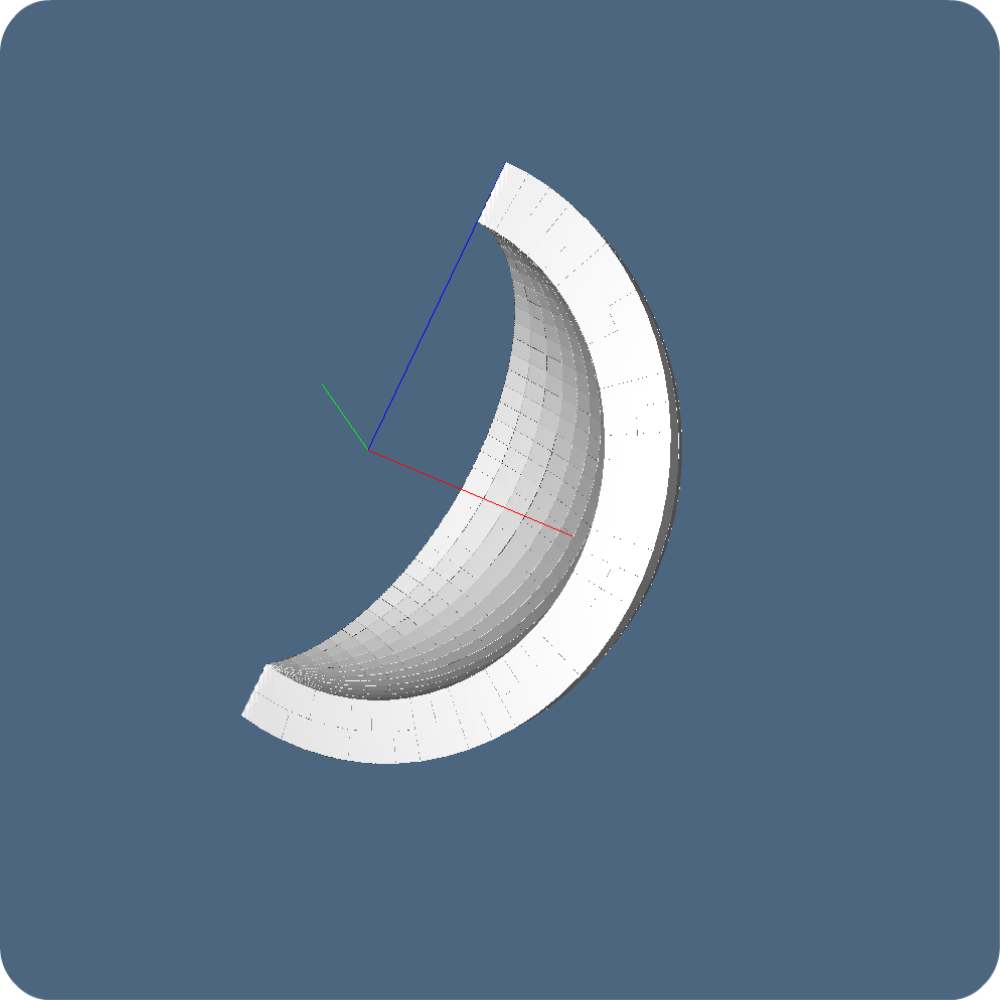
Testata con:

model = larHollowSphere(0.8,1,PI,PI/2)([32,32,32])

VIEW(STRUCT(MKPOLS(model)))

Grafo delle chiamate:

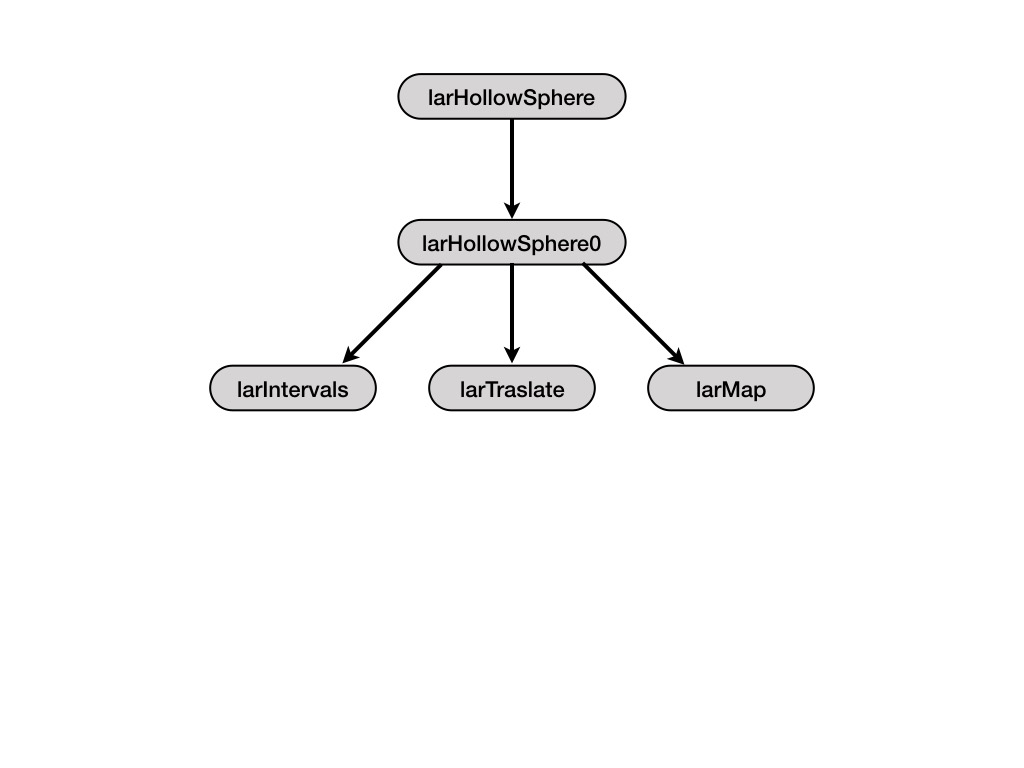
